# Exploratory Data Analysis (EDA)

-------
## Index:
- 1) [Introduction](#Intro)
- 2) [Importing the Data](#Importing)
- 3) [Exploratory Data Analysis](#EDA):
    - [Renaming Columns](#Renaming)
    - [Converting the Date into Time](#Time)
    - [Inspecting Null Values](#Nulls)

- 4) [Visualization](#VS):
    - [Regular and Adjusted Prices](#Everything)
    - [Stock Split](#Drop)
    - [Adjusted Stock Split](#Drop2)
    - [Regular Prices with Volume](#Vol)
    - [Adjusted Price with Volume](#Vol2)

- 5) [Feature Engineering](#FE):
    - [Taking a Look at the Features](#FE2)

- 6) [Visualizing the Engineered Features](#VIS):
    - [Detailed Visualization of the Engineered Features](#VIS2)

- 7) [Exploratory Data Analysis on the New Data Frame](#EDA2)

---------

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import quandl
import re

from datetime import datetime

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

quandl.ApiConfig.api_key = "9tQnPMV9zakeCm4K6S5X"

<a class="anchor" id="Intro"></a>

# Introduction:

Welcome! This notebook is programed to perform an Exploratory Data Analysis on any company in the list below.

### How it works:
- Choose a company's name from the options below.
- Type the company's name after `company_name` as it shows in the code snippet. (The gray box next to the company's name.) 
    - e.g.  'Apple' or "Apple"
- Click on the "Kernel" option in the Jupyter table of content above.
- Then, click "Restart and Run all"
- Scroll down and see the analysis!

**Company Options:**

- Apple, Inc. - `Apple`
- Facebook, Inc. -`Facebook`
- Google LLC - `Google`
- JPMorgan Chase & Co. - `JPMorgan`
- The Goldman Sachs Group, Inc. - `GoldmanSachs`
- Moody's Corporation - `Moodys`
- The International Business Machines Corporation (IBM) - `IBM`
- Twitter Inc. - `Twitter`
- BlackRock, Inc. - `BlackRock`
- Microsoft Corporation - `Micrisoft`

-----

### Company's Name:

In [2]:
company_name = 'Apple'

<a class="anchor" id="Importing"></a>

## Importing Stock History - Apple:

**The data that was requested from Quadle's API.**

In [3]:
df = pd.read_csv(f'data/{company_name}_quandle.csv')

In [4]:
df.head(3)

,Date,WIKI/AAPL - Open,WIKI/AAPL - High,WIKI/AAPL - Low,WIKI/AAPL - Close,WIKI/AAPL - Volume,WIKI/AAPL - Ex-Dividend,WIKI/AAPL - Split Ratio,WIKI/AAPL - Adj. Open,WIKI/AAPL - Adj. High,WIKI/AAPL - Adj. Low,WIKI/AAPL - Adj. Close,WIKI/AAPL - Adj. Volume
0,1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1,1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
2,1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0


--------
<a class="anchor" id="EDA"></a>

# Exploratory Data Analysis

<a class="anchor" id="Renaming"></a>
## Renaming the Columns:
Upon requesting the data from Quandle, the columns have unnecessary words/letters in the title; therefore, the function below will clean up the column name.

In [5]:
def rename_columns(columns):
    """ 
    Returns a clean Data frame. 
    
    Parameter
    -----------
    company_name : str or method
        Passes the string or method: df.columns.
    """
    column_names = []
    for name in df.columns:
        column_names.append(name)
    # Cleans the Column Name by using Regex and deleting unnecessary words.
    clean_columns = [re.sub('[\s\.-]+', '_', name.split(' - ')[1]) for name in column_names if name != 'Date']
    # Inserting the date column to avoid conflicts
    clean_columns.insert(0,'Date')
    return clean_columns

In [6]:
df.columns = rename_columns(df.columns)
df.head(2)

,Date,Open,High,Low,Close,Volume,Ex_Dividend,Split_Ratio,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
0,1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1,1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0


--------

---------
<a class="anchor" id="Time"></a>
## Converting the Date from an Object to Datetime:
The `Date` values are currently objects, therefore they will be converted into time.

In [7]:
df['Date'] = pd.to_datetime(df.Date)
df.head(2)

,Date,Open,High,Low,Close,Volume,Ex_Dividend,Split_Ratio,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
0,1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1,1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0


In [8]:
# df['Date'] = pd.to_datetime(df.Date, yearfirst=True, format='%Y-%m-%d')
# df.sort_index(inplace=True, ascending=True)
# df.head(2)

-------
<a class="anchor" id="Nulls"></a>
## Inspecting for Missing Values:

**No missing values were found.**

In [9]:
df.isnull().sum().sum()

0

-------------- 
<a class="anchor" id="VS"></a>

# Visualization

### Creating a Function:
The function below will graph the price of the stock data.

In [10]:
def make_a_plot(dataframe, column_1, column_2=None, 
                start_date = None,
                end_date = None,
                company_name=company_name,
                subplots=False):
    """ 
    Returns a graph plotting the columns/prices. 
    
    Parameter
    -----------
    dataframe : var
        Passes a variable assigned to a dataframe
    column_1 : str
        Passes a string from a column
    column_2 : str
        Passes a string from a column
    start_date : str
        Passes the starting date to be plotted in the format YYYY-MM-DD
    end_date : str
        Passes the end date to be plotted in the format YYYY-MM-DD
    company_name : str
        Passes the companies name
    subplots : boolean
        Passes a boolean to plot a subplot.
    """
    temp_df = dataframe.copy()
    # Setting up a loop incase a Start and/or End Date are passed
    if start_date:
        temp_df = temp_df[temp_df['Date']>=start_date]
    if end_date:
        temp_df = temp_df[temp_df['Date']<=end_date]
    # Setting the Date as the index
    temp_df.set_index('Date', inplace=True, drop=False)
    # Setting up the size of the plot and a dark background
    plt.figure(figsize=(14,7))
    sns.set_style("darkgrid")
    # Boolean incase a subplot is instantiated
    if subplots:
        ax1 = plt.subplot2grid((3,1), (0,0), rowspan=2)
    temp_df[column_1].plot(lw=2.5)
    
    # Setting up a loop incase a second column is passed and if a subplot is passed as well
    if column_2:
        if subplots:
            ax2 = plt.subplot(3, 1, 3)
        temp_df[column_2].plot(lw=2.5)
        if subplots:
            plt.sca(ax1)
        plt.title(f'{company_name}: {column_1} and {column_2}\n'
                  f'{str(temp_df.Date.min())[:10]} - {str(temp_df.Date.max())[:10]}', fontsize=18)
        
    else:
        plt.title(f'{company_name}: {column_1}\n'
              f'{str(temp_df.Date.min())[:10]} - {str(temp_df.Date.max())[:10]}', fontsize=18)
    plt.ylabel('Price ($)', fontsize=14)
    # Setting up a loop for a subplot 
    if subplots:
        ax1.get_xaxis().set_visible(False)
        plt.sca(ax2)
        plt.ylabel(f'{column_2}', fontsize=14)
        plt.legend()
    plt.xlabel('Date', fontsize=14)
    plt.legend()
    plt.tight_layout()

------
## Visualizing Historical Prices:

The stock data will be plotted in pairs using the function above.

In [11]:
def simple_plots(dataframe):
    """ 
    Returns a graph. 
    
    Parameter
    -----------
    dataframe : var
        Passes a variable assigned to a dataframe

    """
    # Importing combinations plot pairs
    from itertools import combinations
    temp_df = dataframe.copy()
    
    non_adjusted_cols = []
    # Adding columns with the regular price into the list above
    for col_name in temp_df.columns:
        if col_name == 'Open' or col_name == 'Close' or col_name == 'High' or col_name == 'Low':
            non_adjusted_cols.append(col_name)
    # Combining pairs from the regular price list
    non_adjusted = list(combinations(non_adjusted_cols, 2))
    # Plotting the pairs using the make_a_plot function
    for pair in non_adjusted:
        make_a_plot(temp_df, pair[0], pair[1])

        
    adjusted_cols = []
    # Adding colums with adjusted prices into the list above
    for col_name in temp_df.columns:
        if col_name == 'Adj_Open' or col_name == 'Adj_Close' or col_name == 'Adj_High' or col_name == 'Adj_Low':
            adjusted_cols.append(col_name)
   
    # Combining pairs from the regular price list
    adjusted = list(combinations(adjusted_cols, 2))
    # Plotting the pairs using the make_a_plot function
    for couple in adjusted:
        make_a_plot(temp_df, couple[0], couple[1])
    
    
#     for col_name in temp_df.columns:
#         if col_name != 'Date' and col_name != 'Volume' and col_name != 'Ex_Dividend' \
        # and col_name != 'Split_Ratio' and col_name != 'Adj_Volume':
#             make_a_plot(temp_df, col_name)

<a class="anchor" id="Everything"></a>


### Plotting Everything:

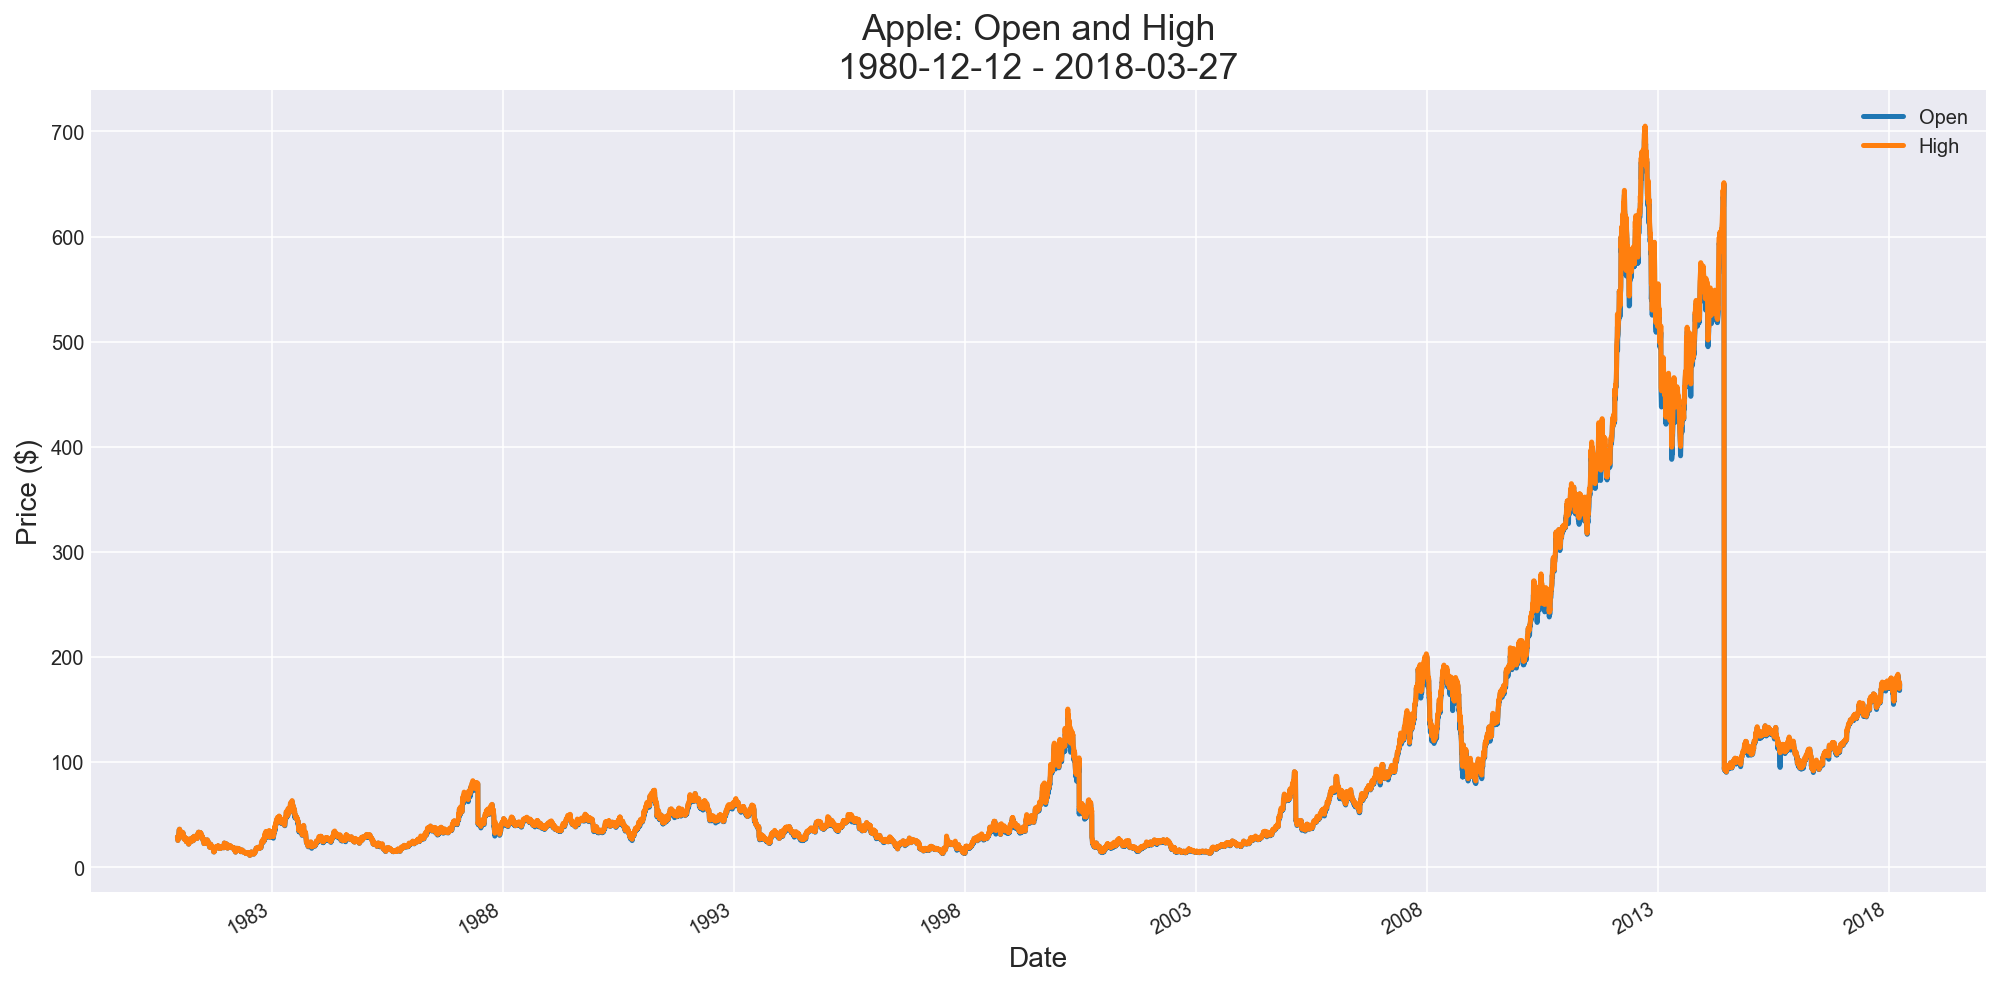

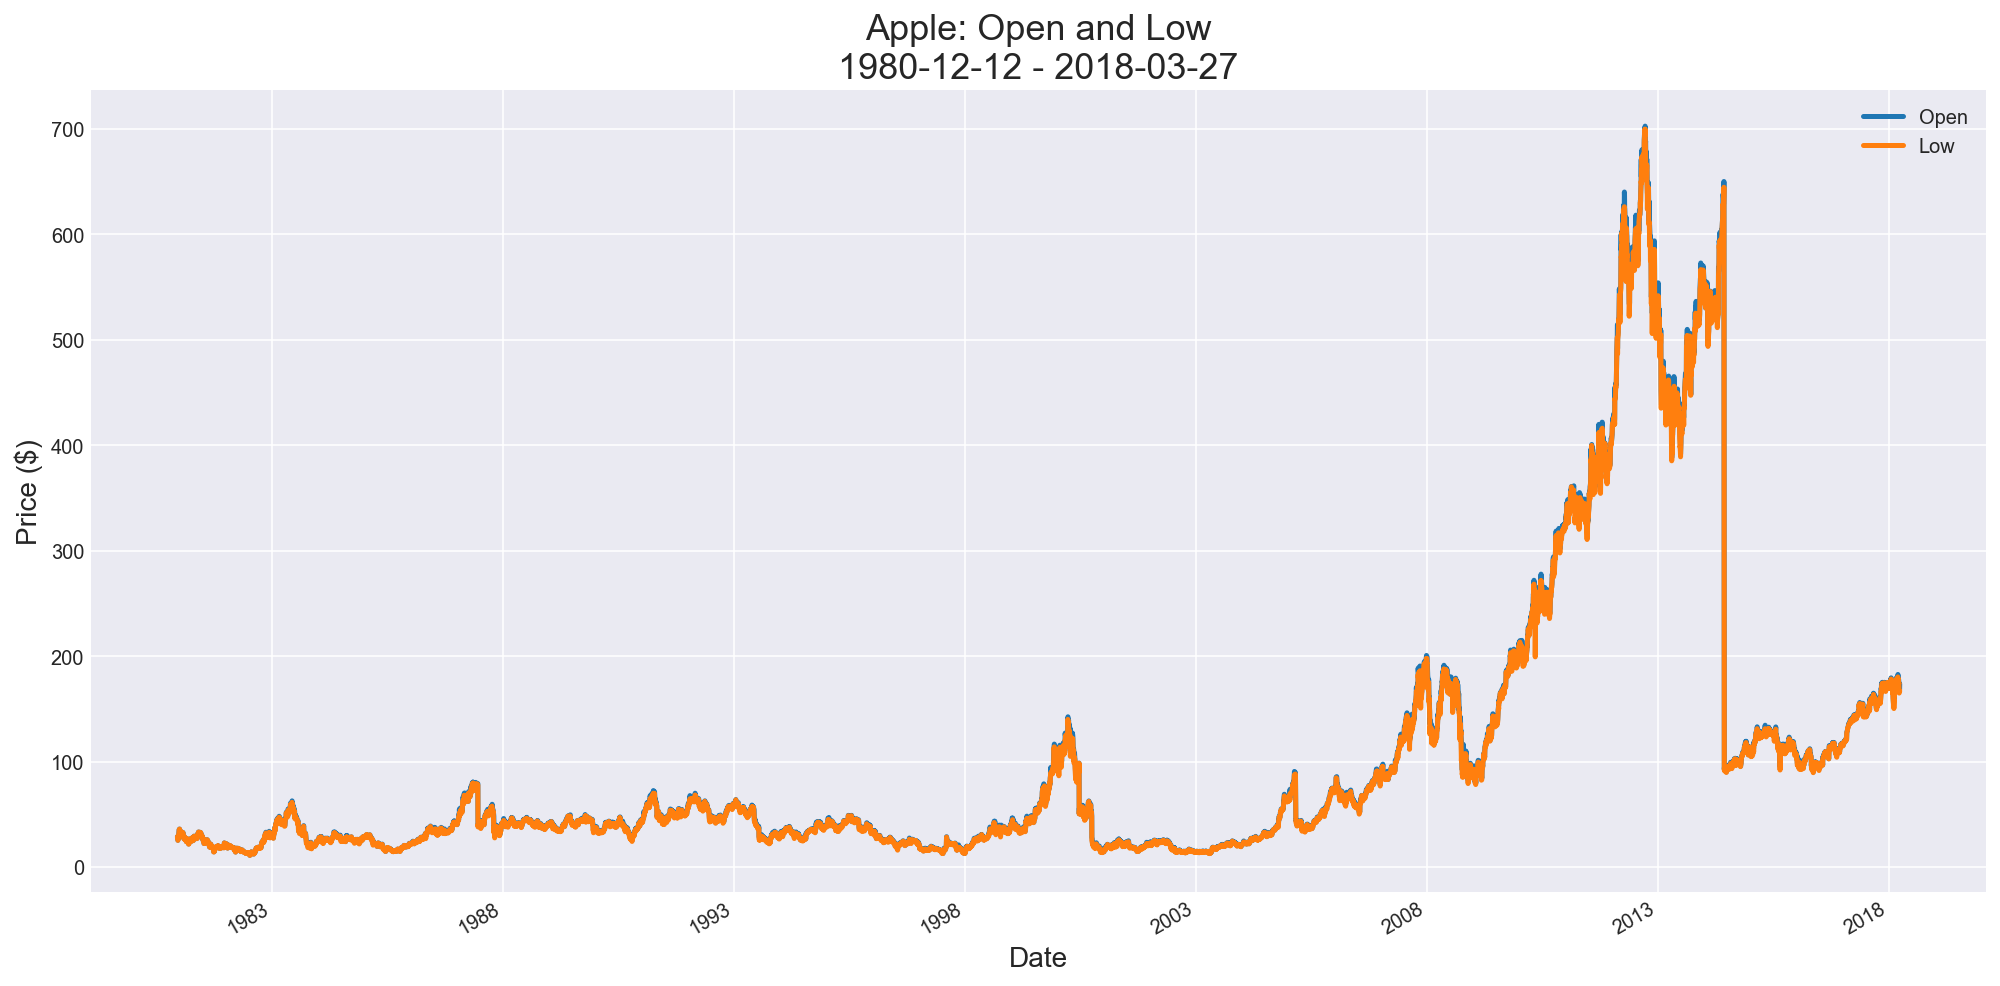

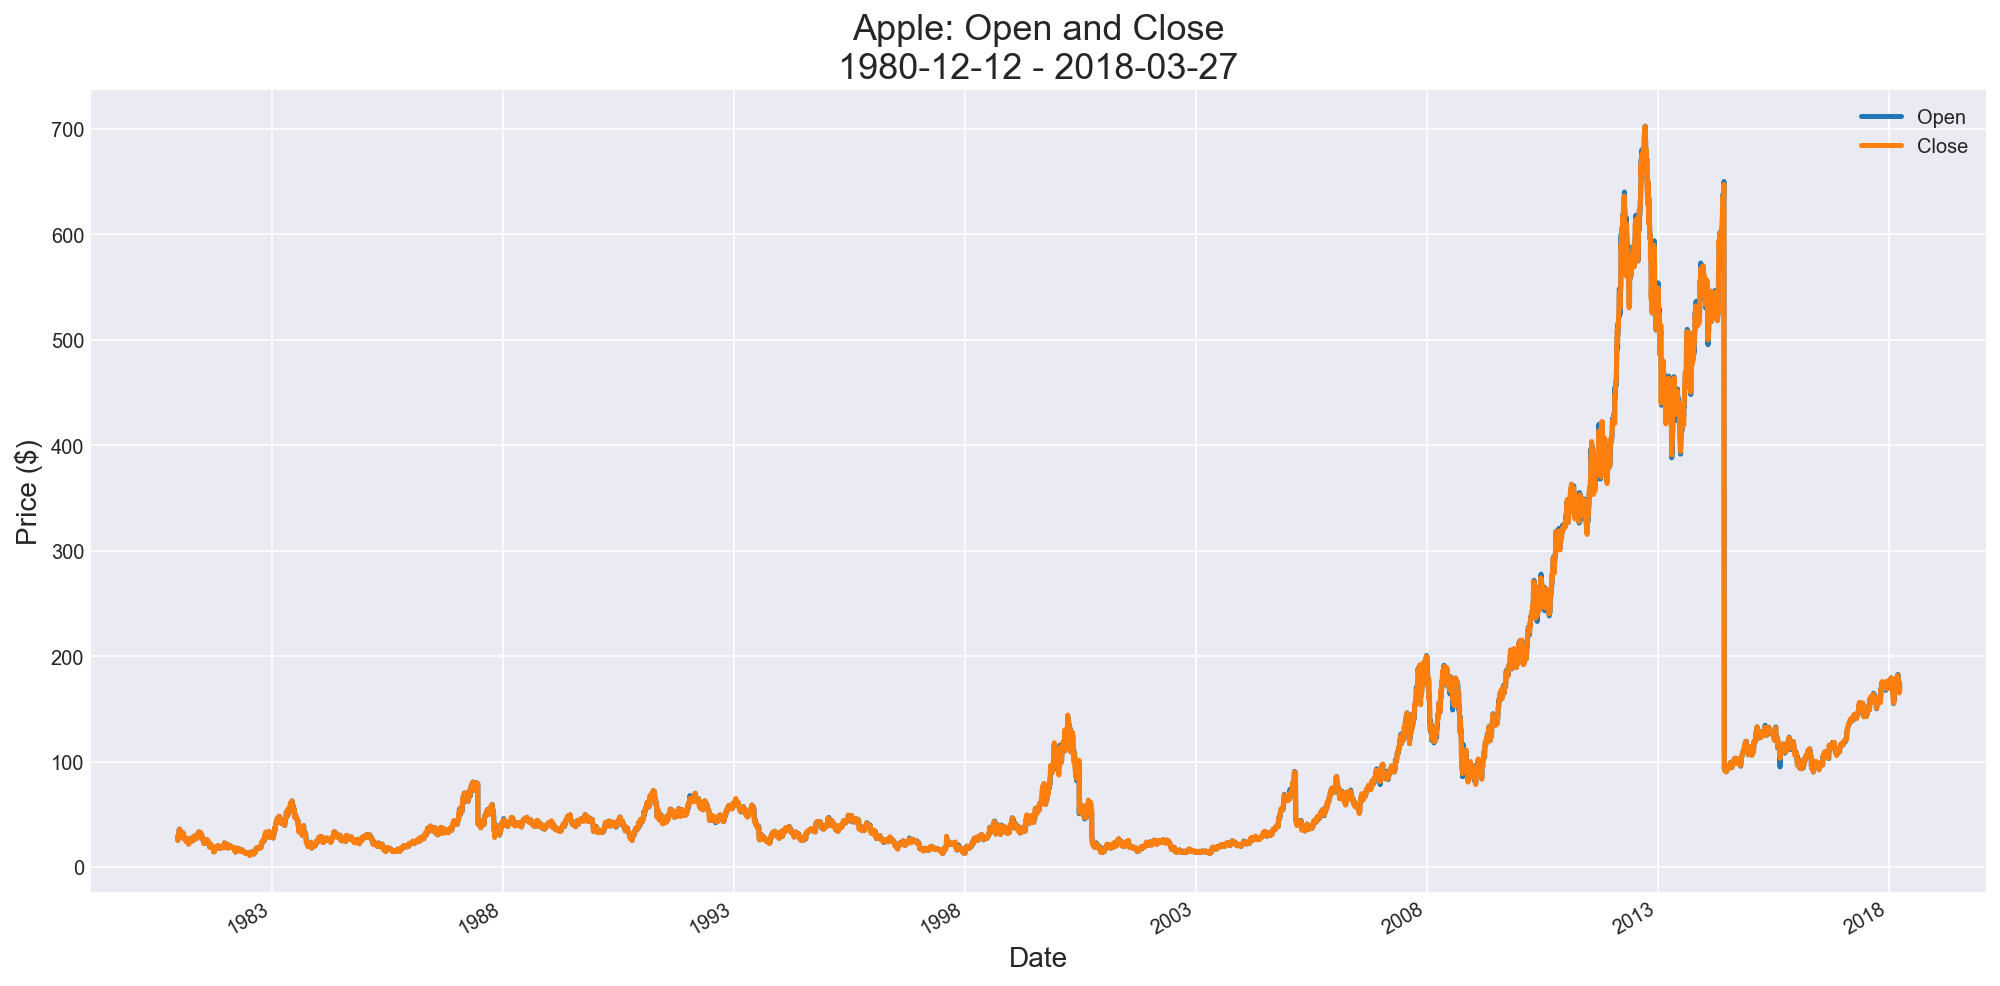

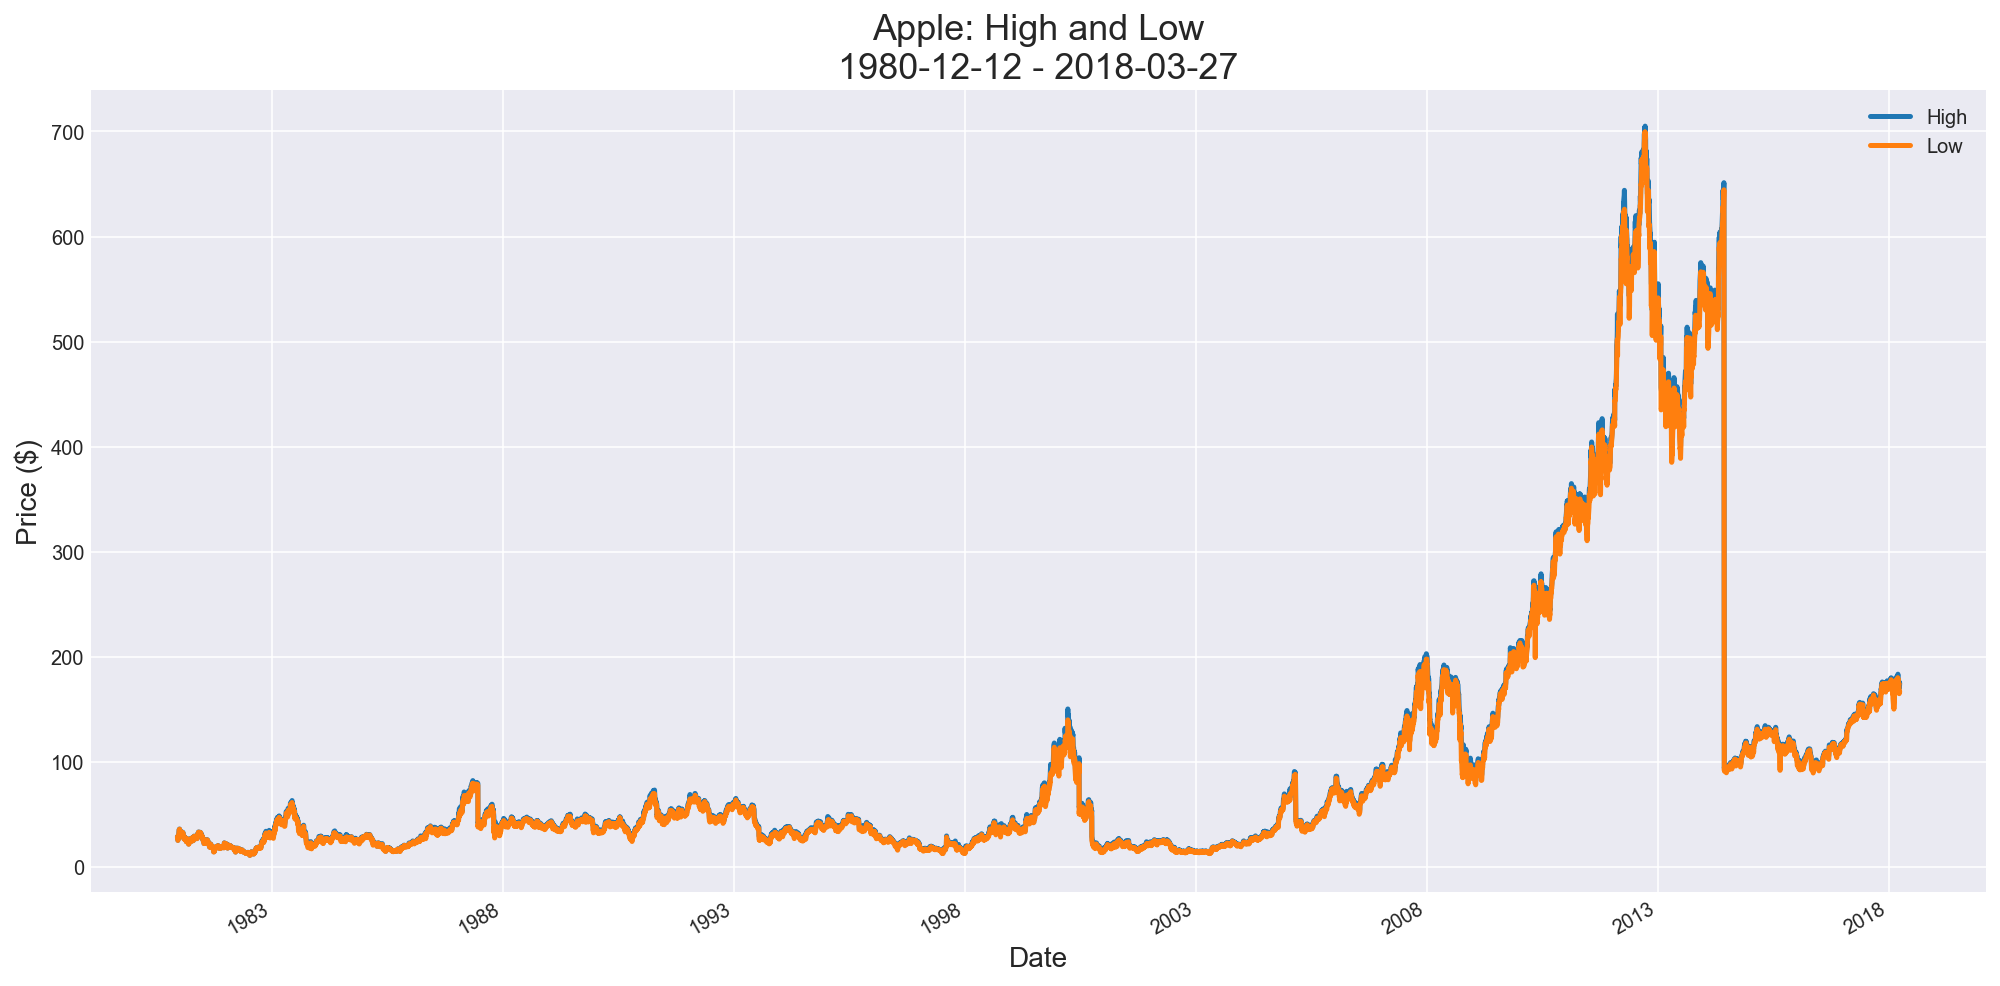

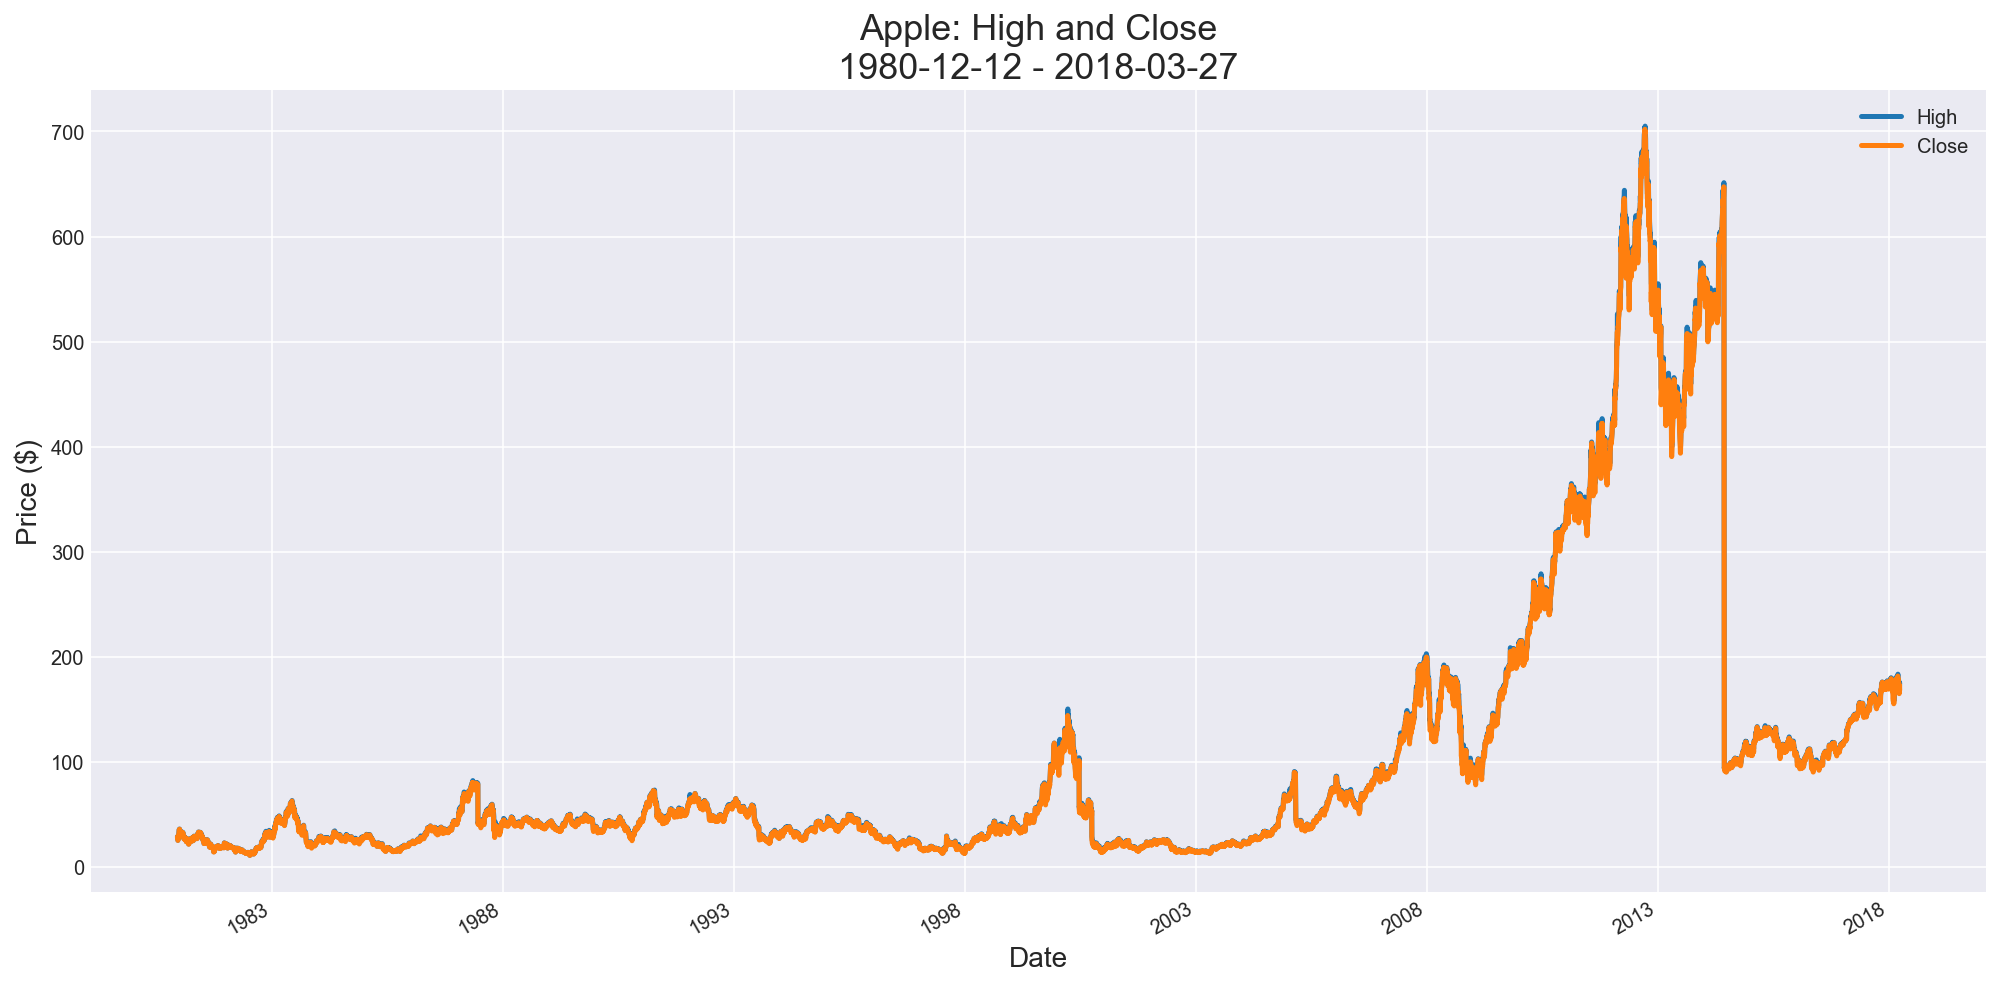

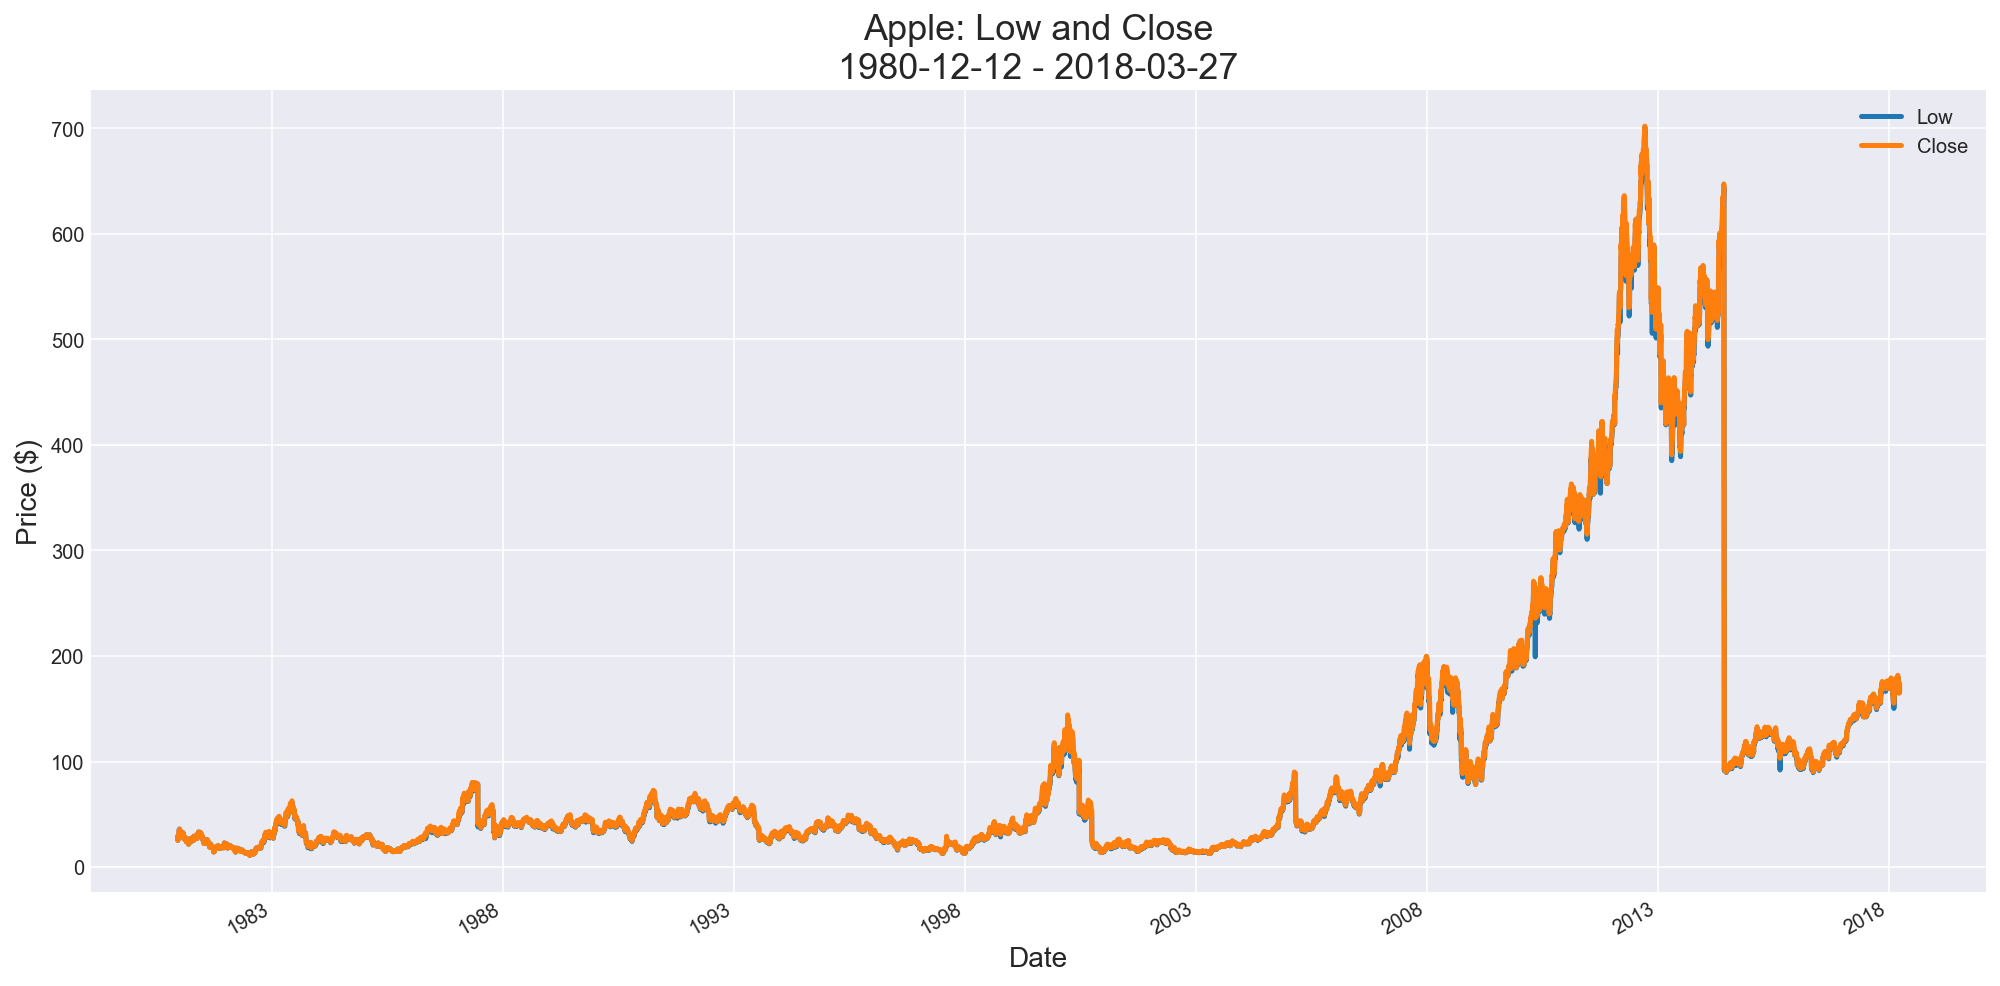

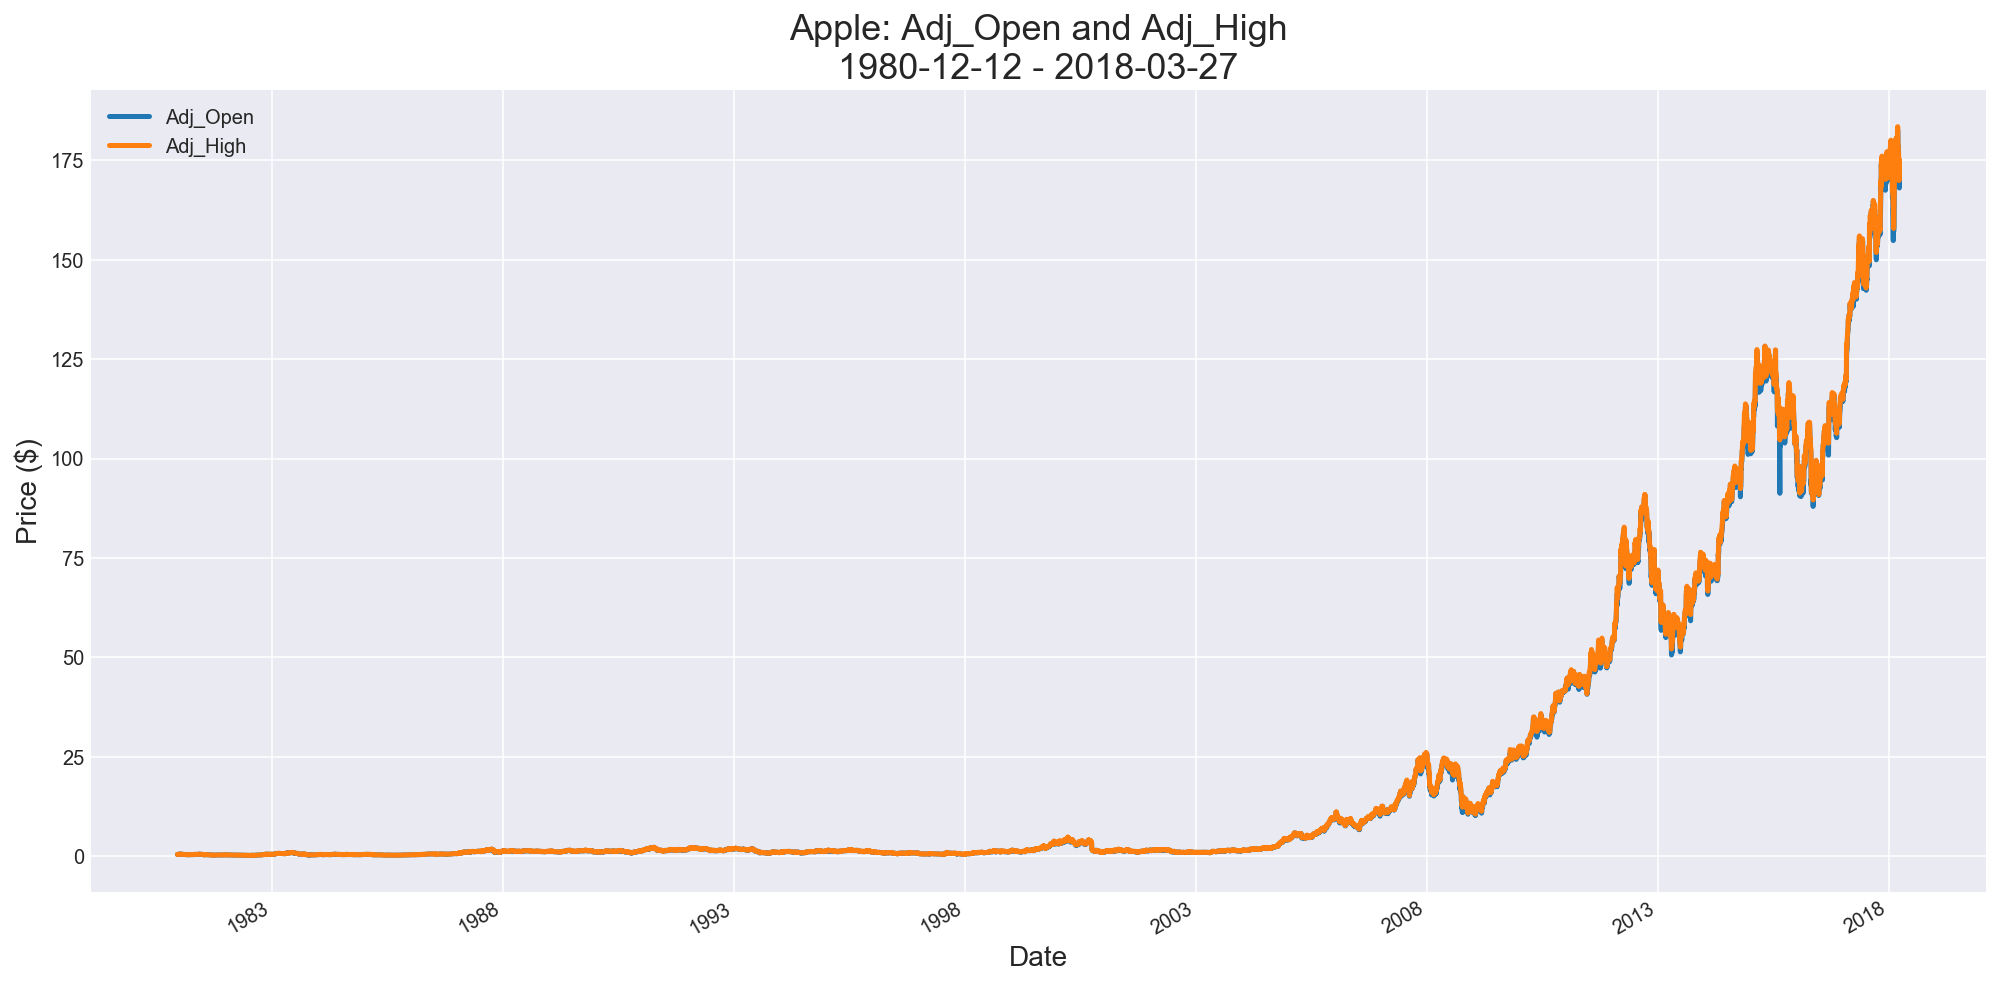

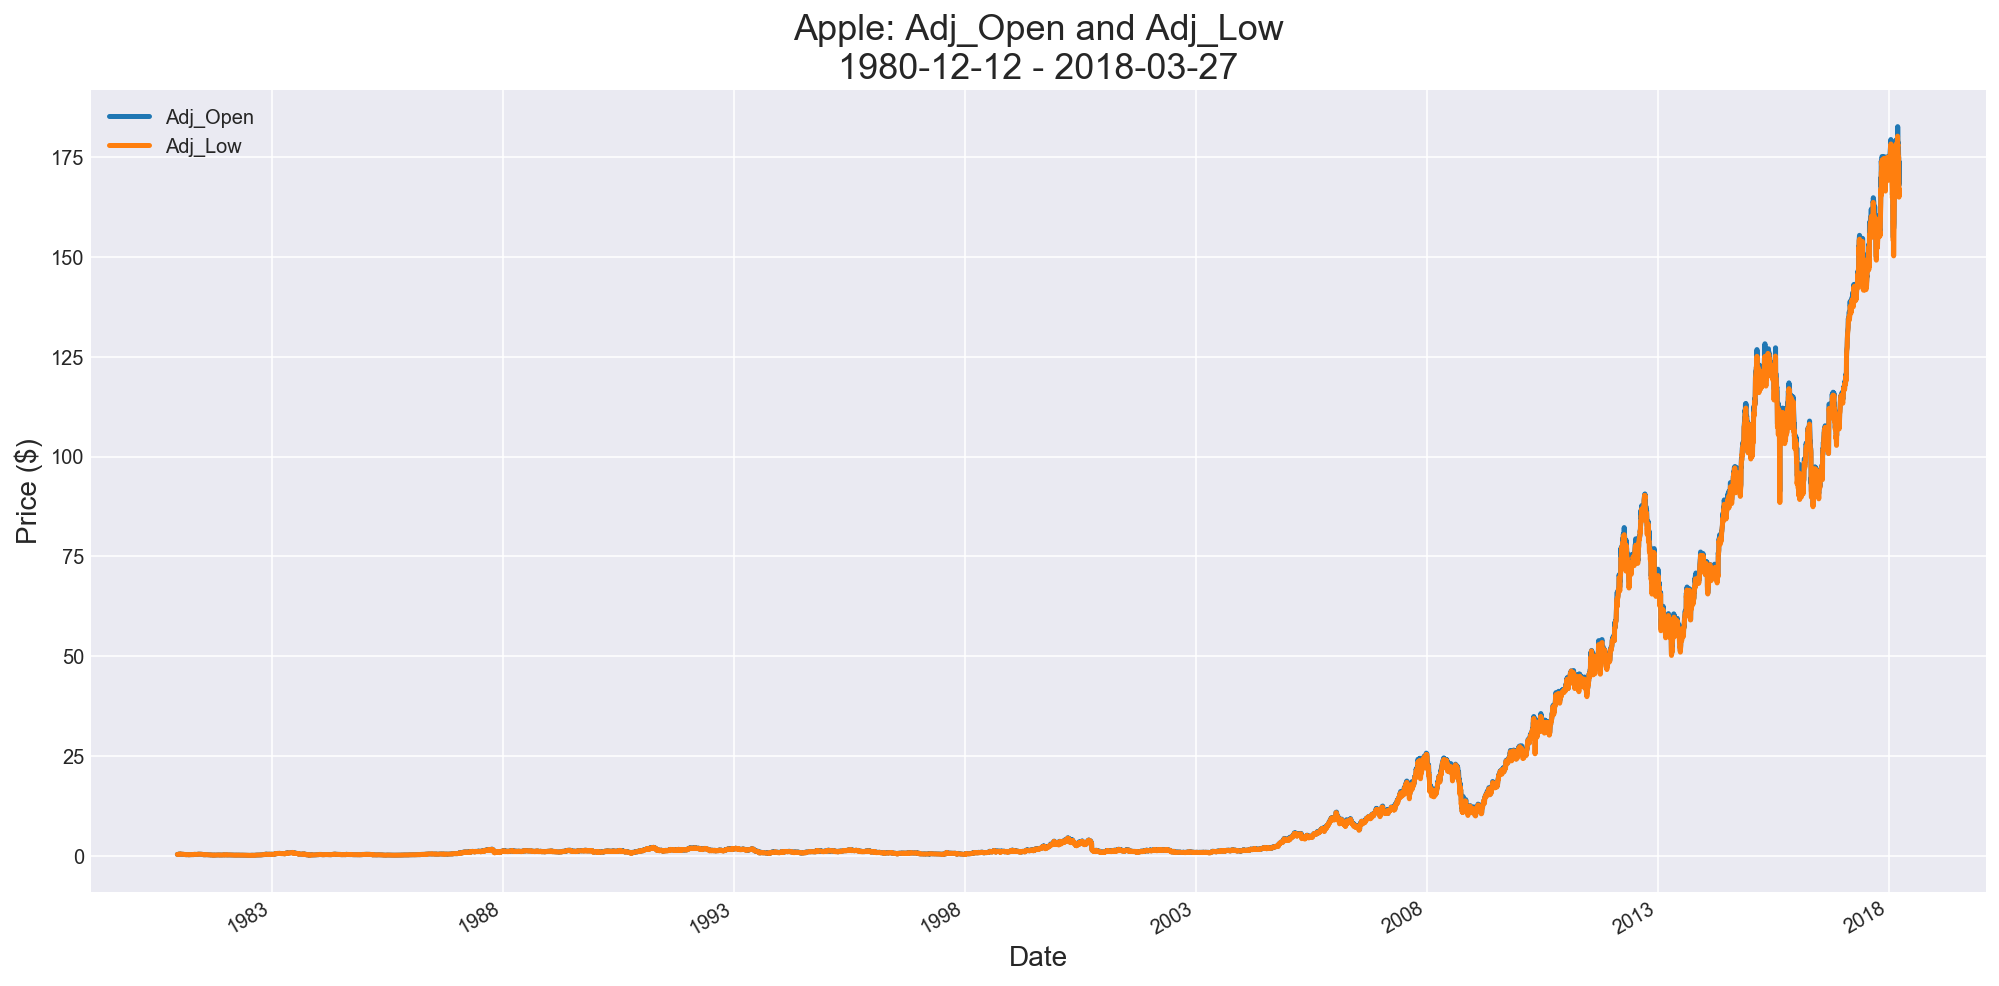

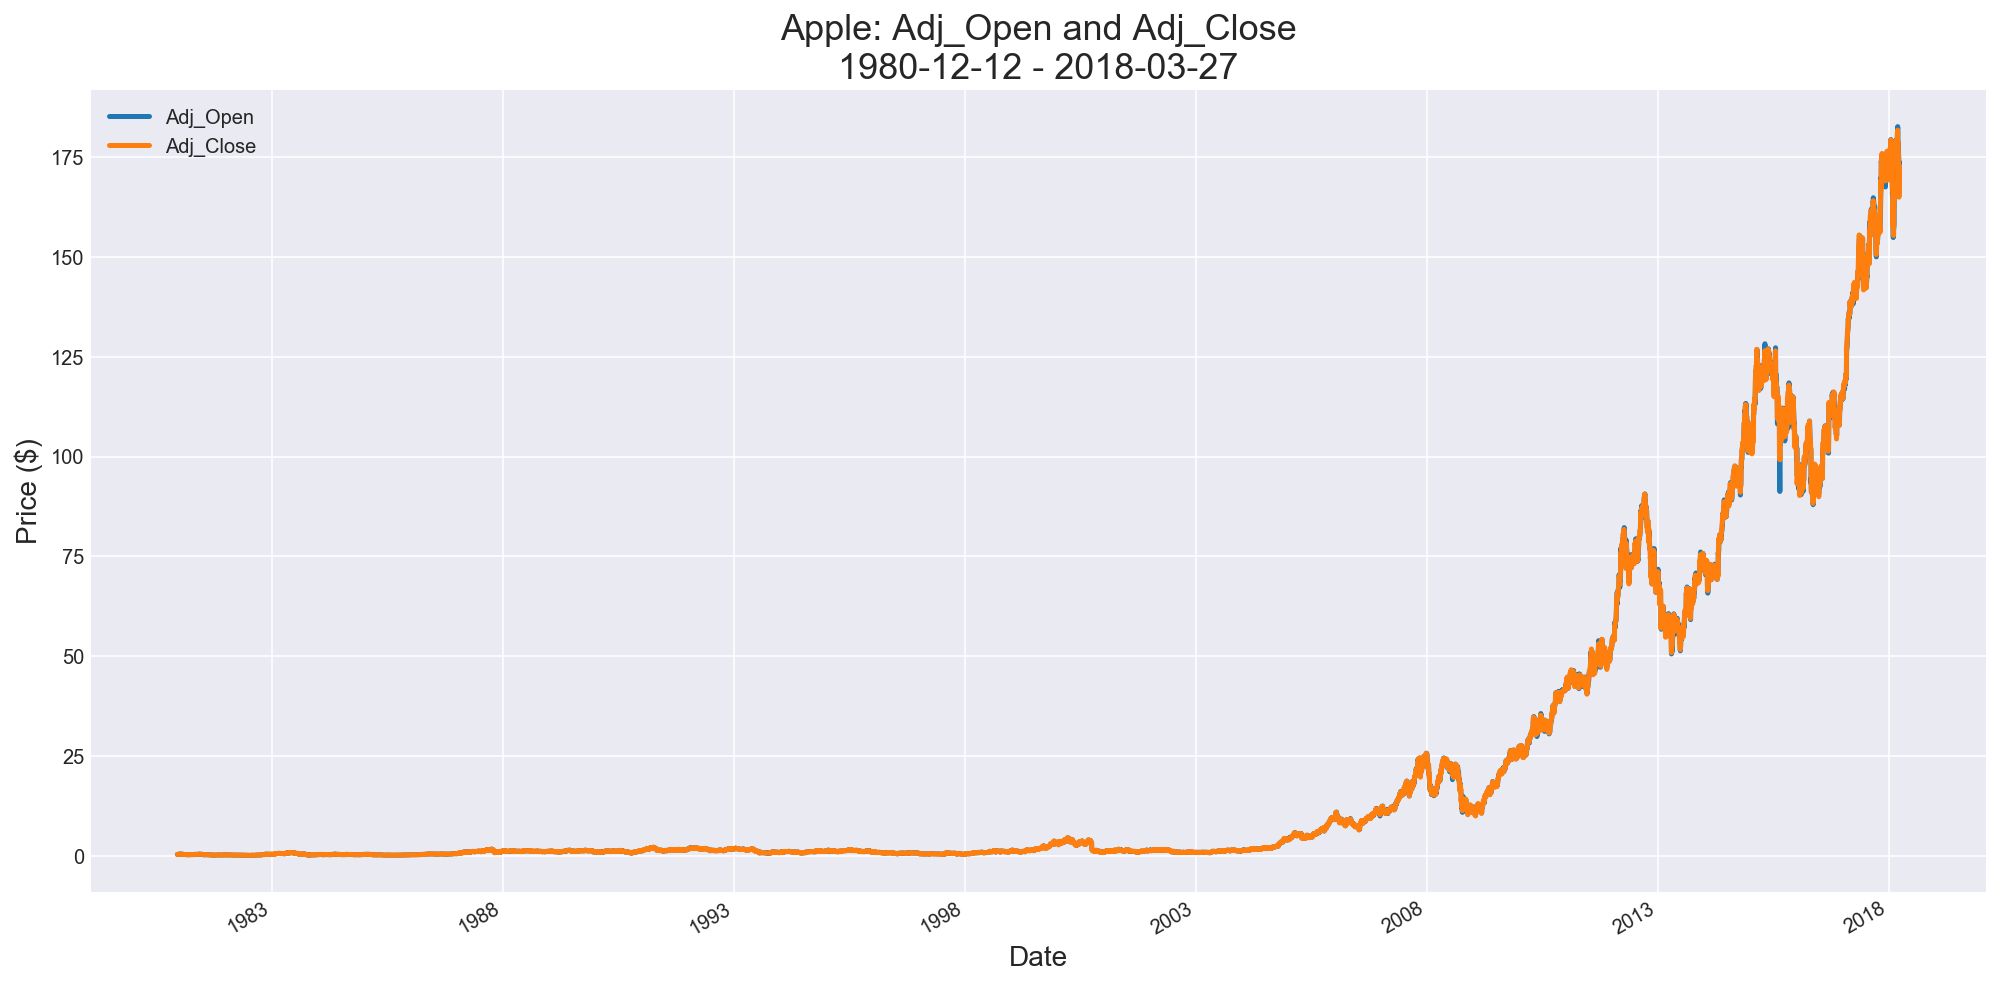

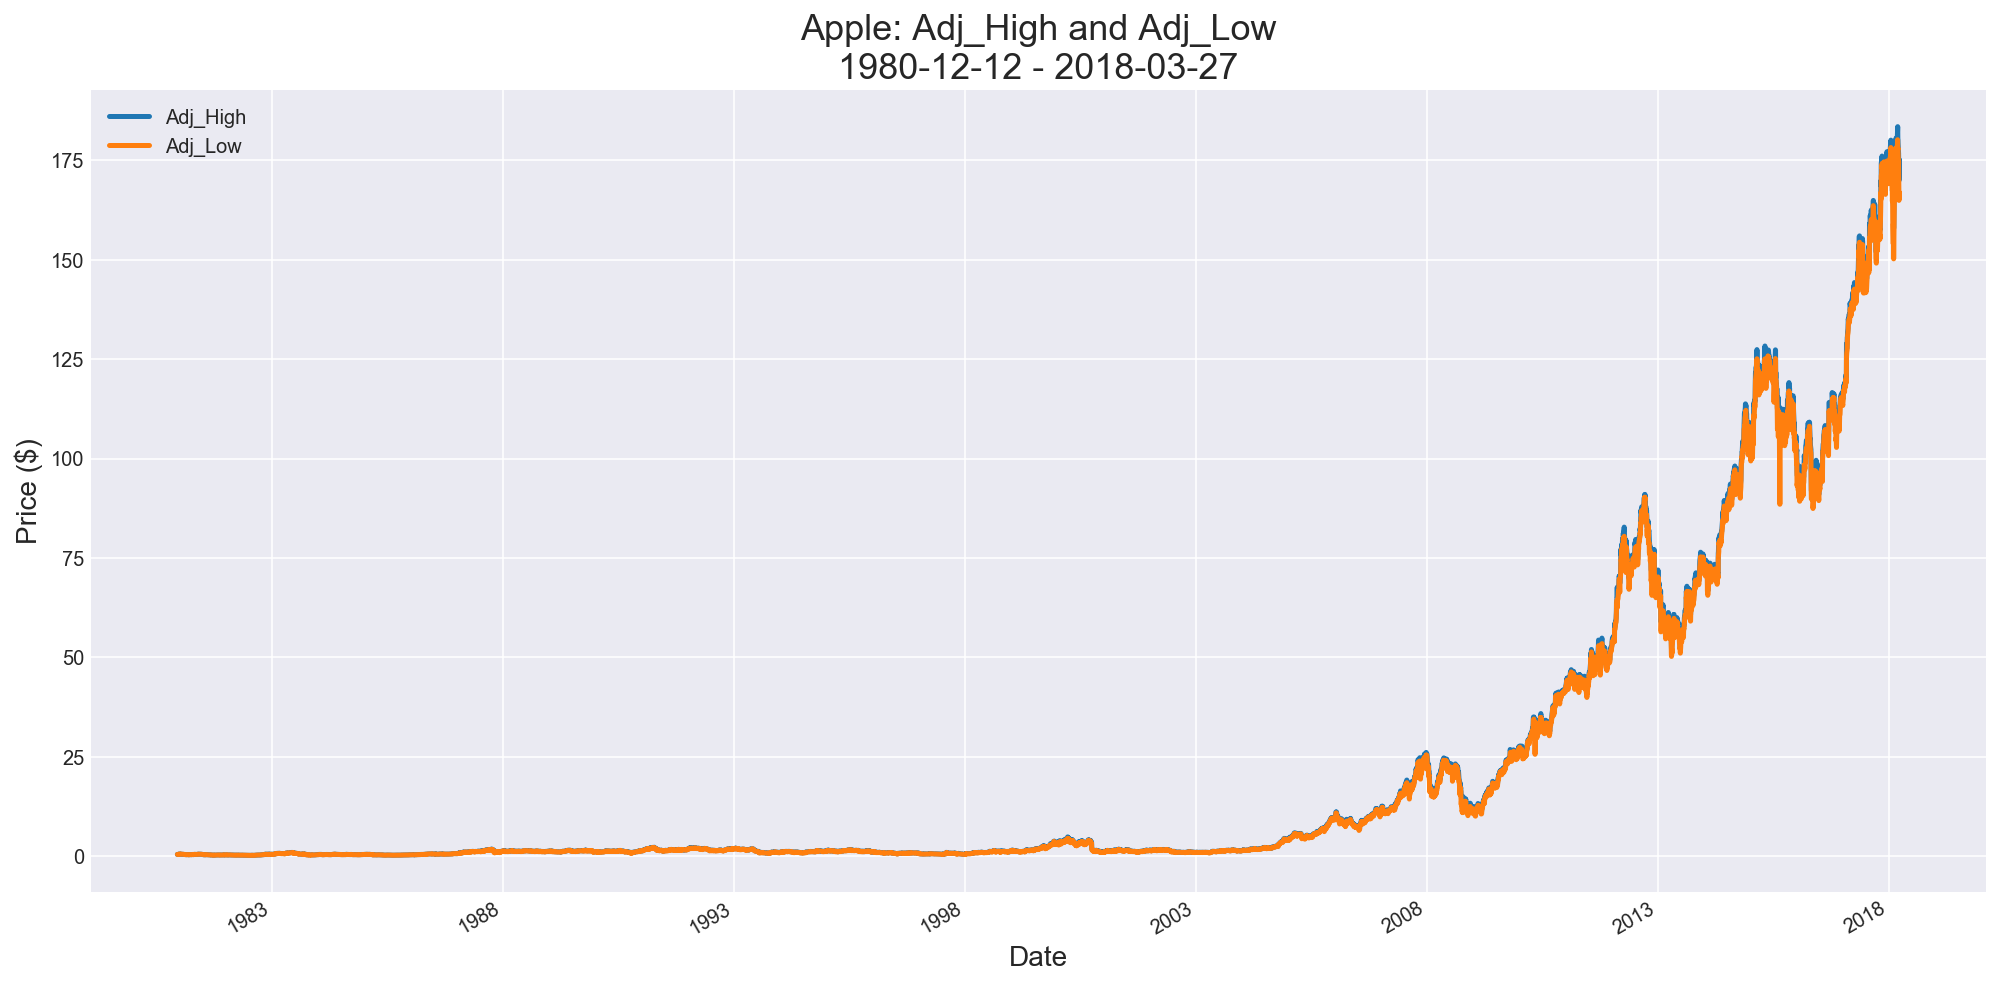

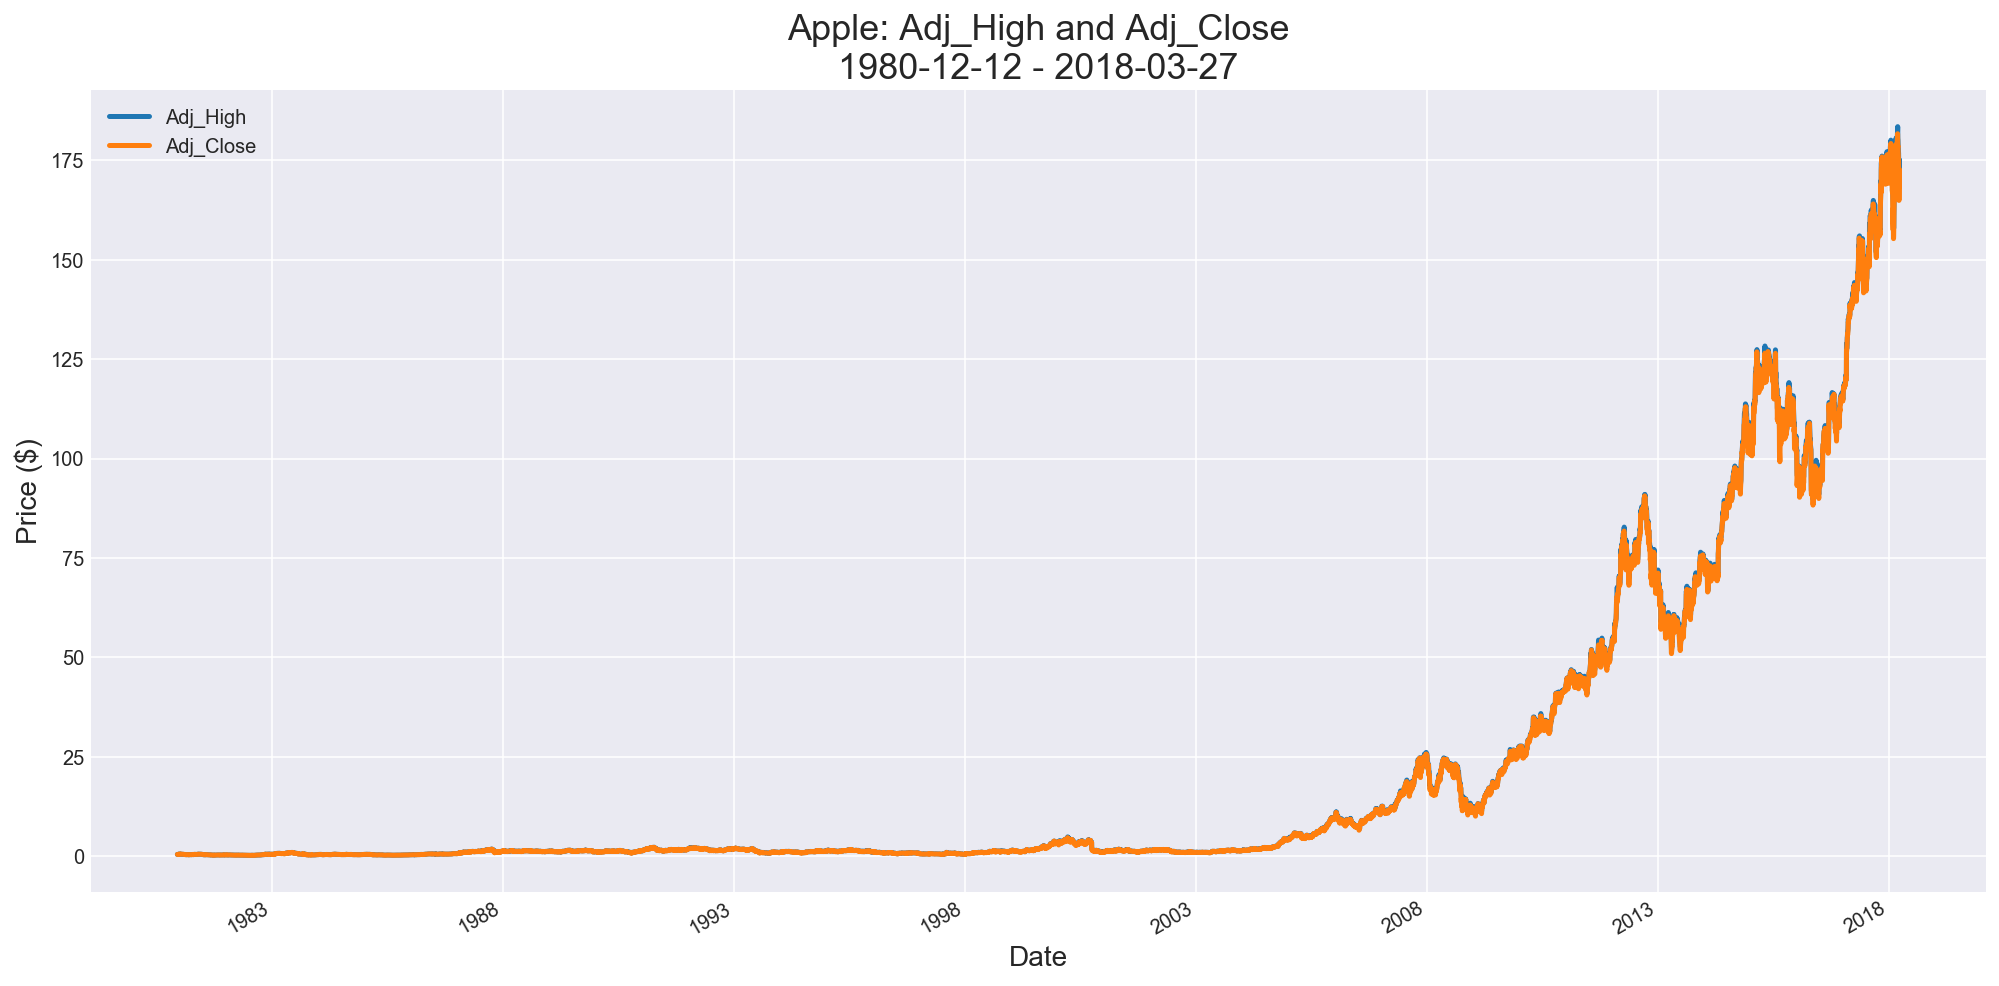

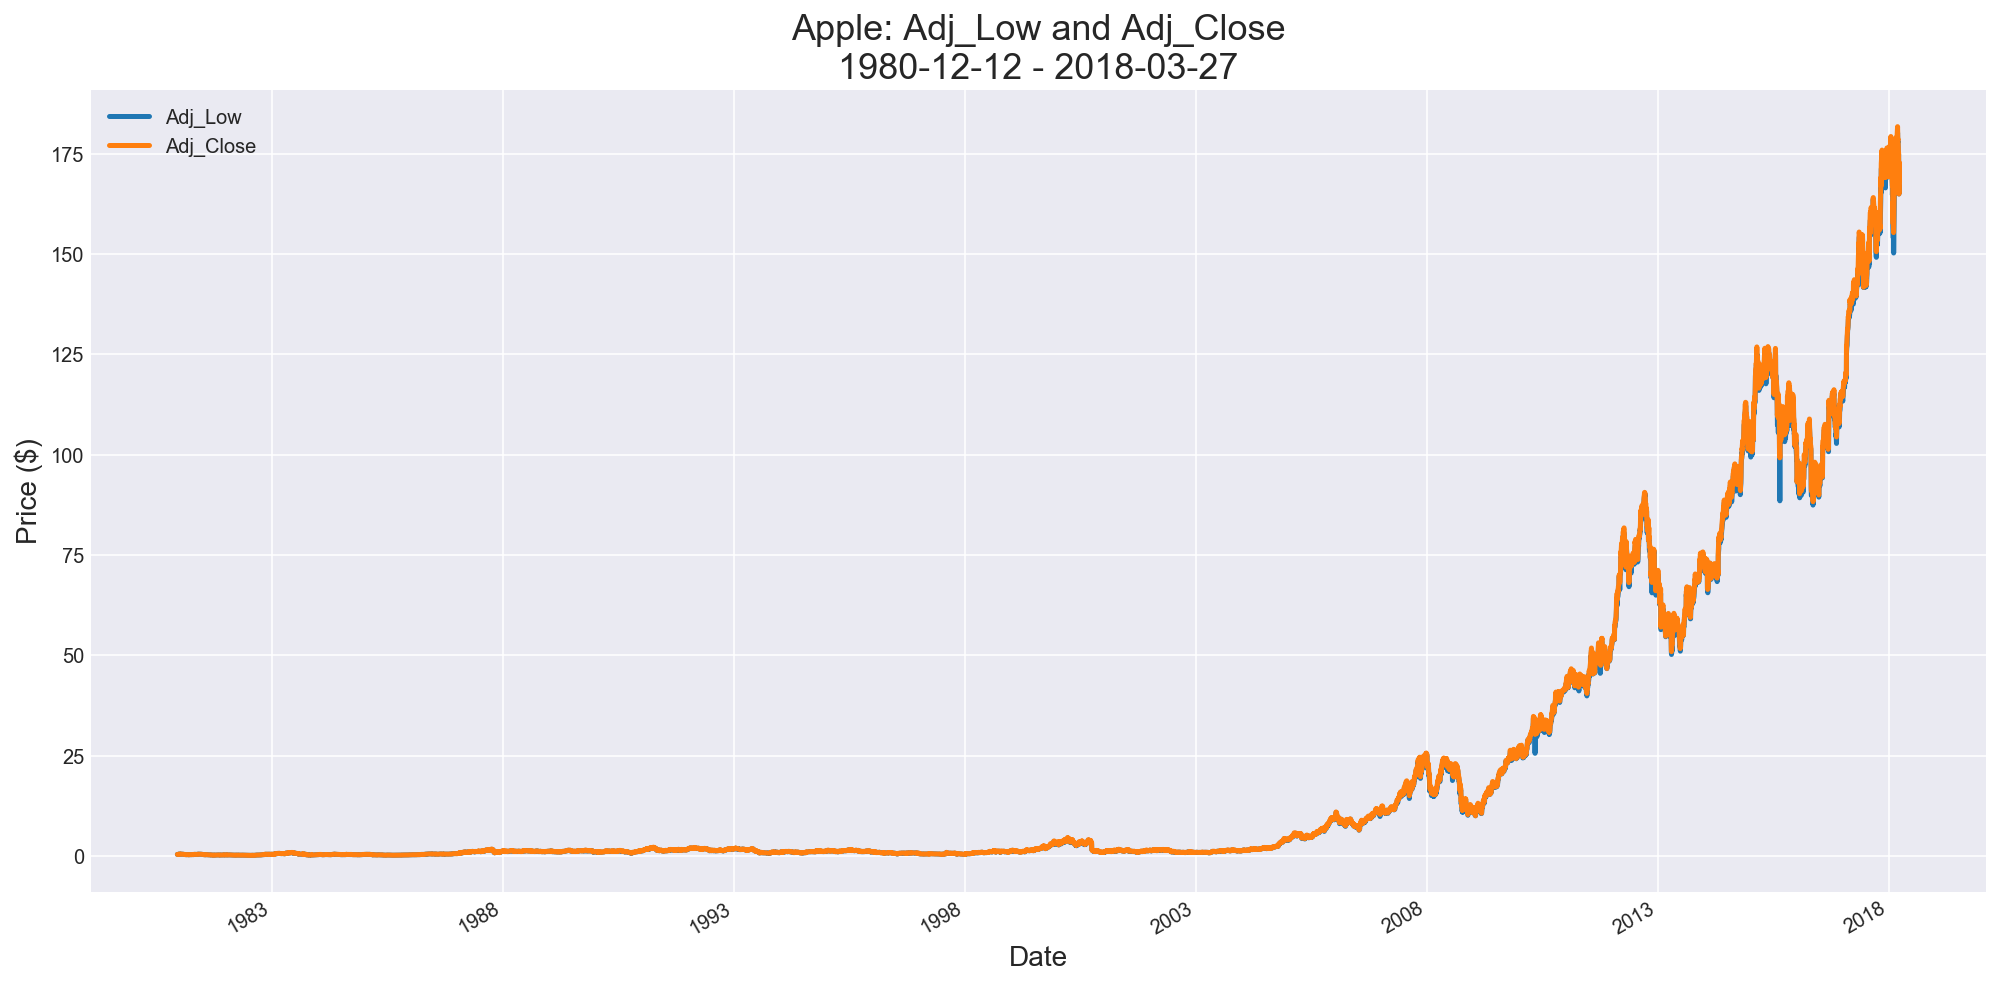

In [12]:
simple_plots(df)

-------

# Detailed Inspection of the Stock
<a class="anchor" id="Drop"></a>

##  Inspecting the Regular Price:

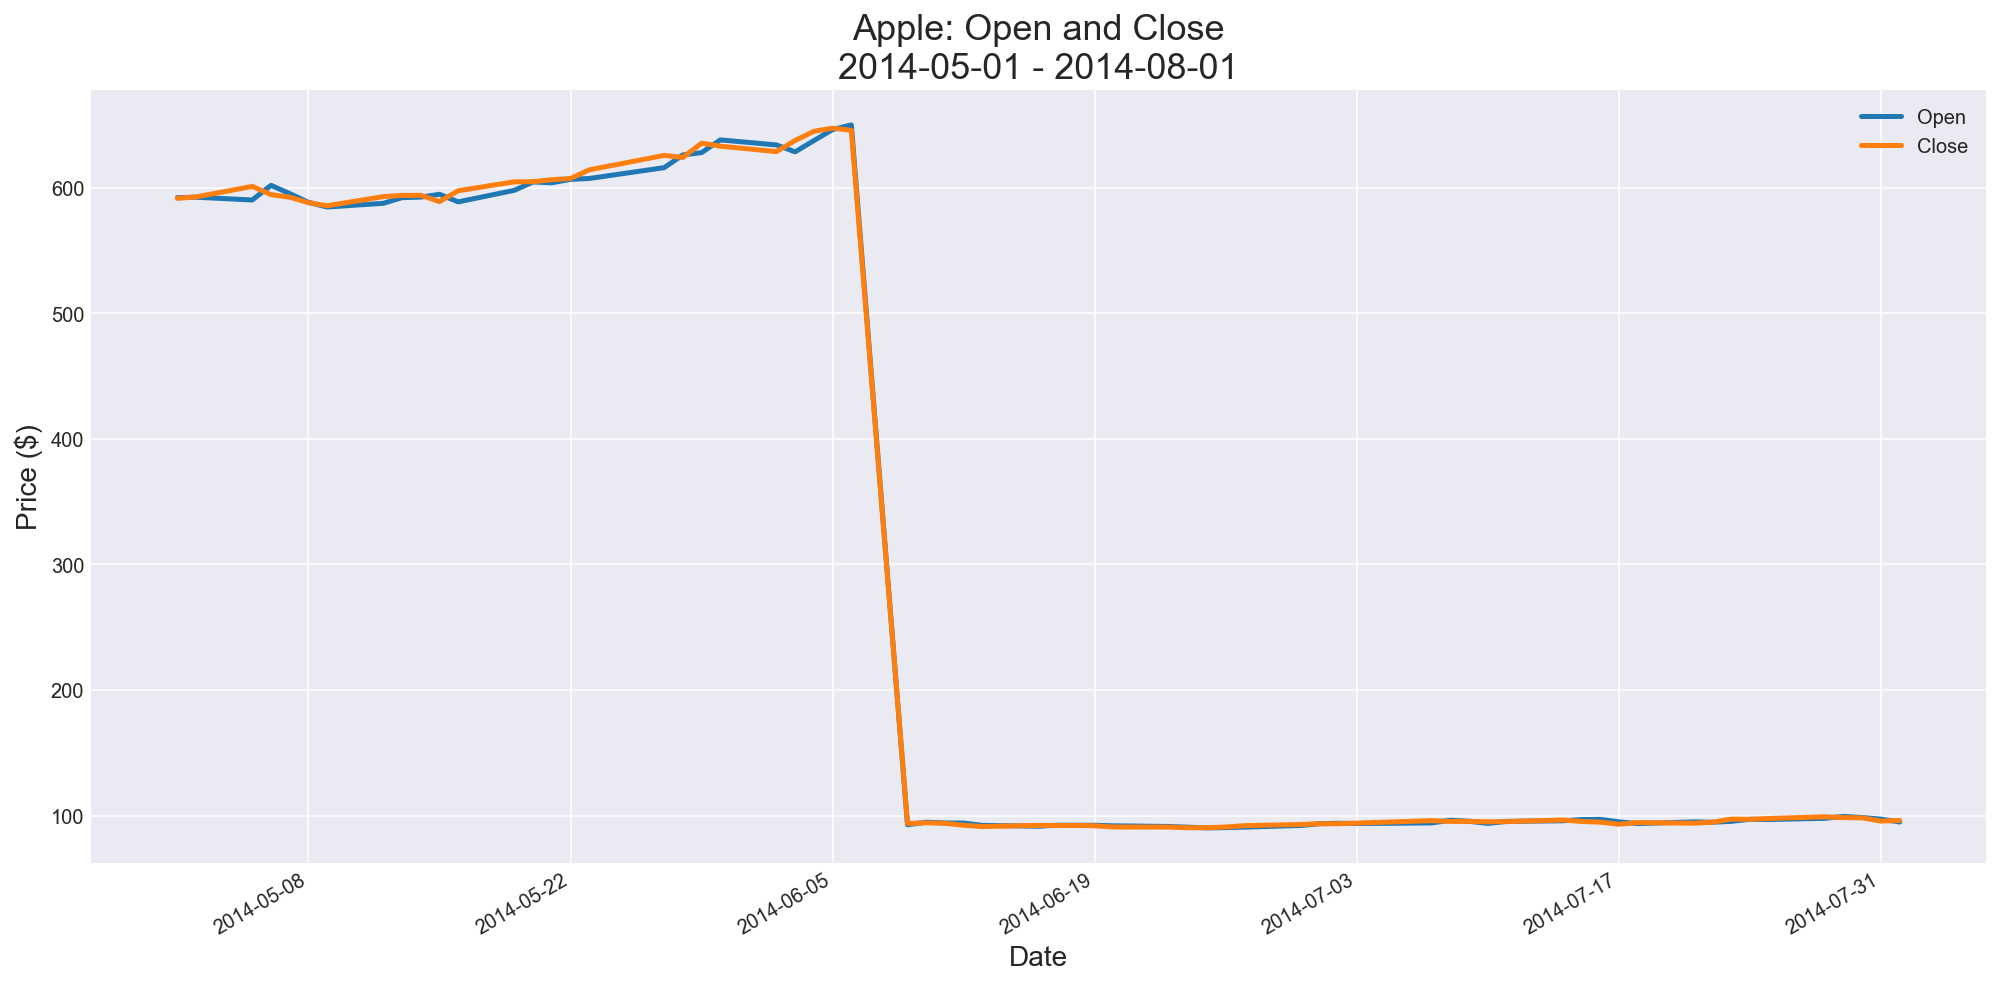

In [13]:
make_a_plot(df, 'Open', 'Close', '2014-05-01', '2014-08-01')

<a class="anchor" id="DropAdj"></a>
## Inspecting the Adjusted Price:

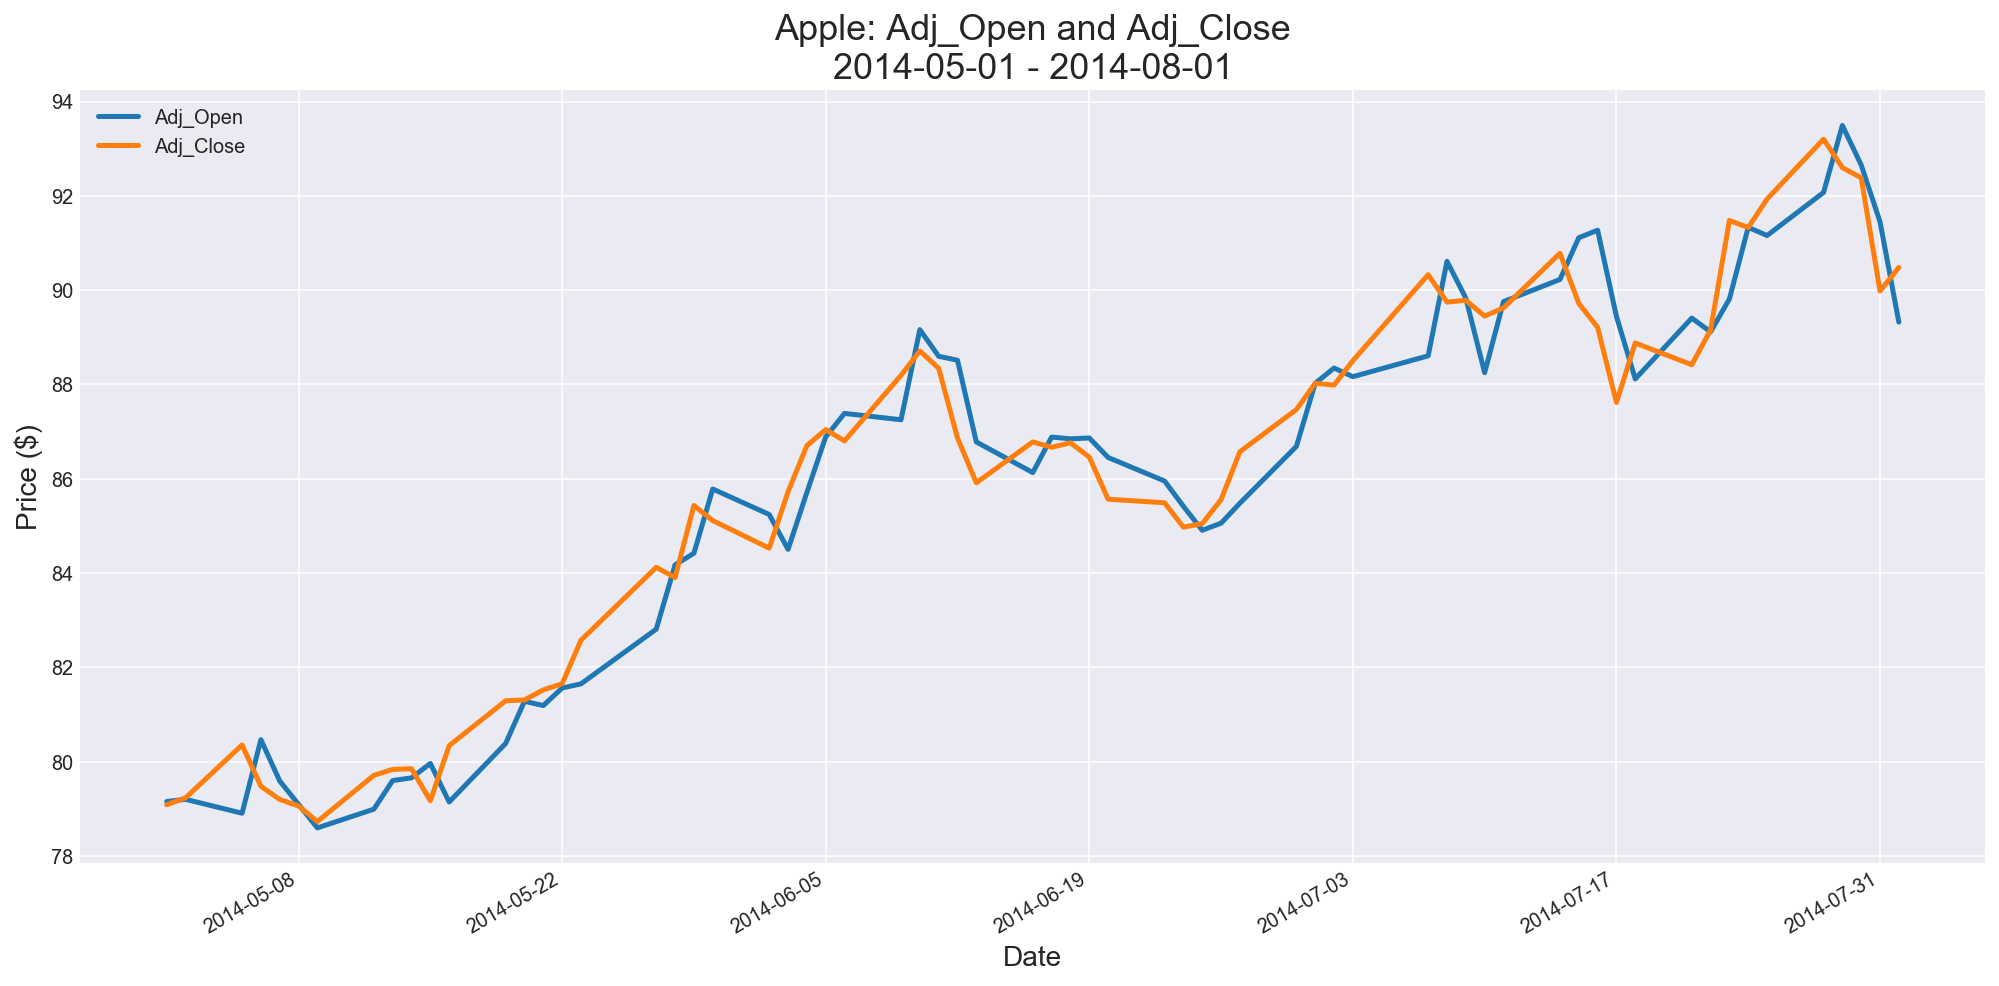

In [14]:
make_a_plot(df, 'Adj_Open', 'Adj_Close', '2014-05-01', '2014-08-01')

<a class="anchor" id="Vol"></a>
## Visualizing with the Volume:

### Plotting with the Regular Price:

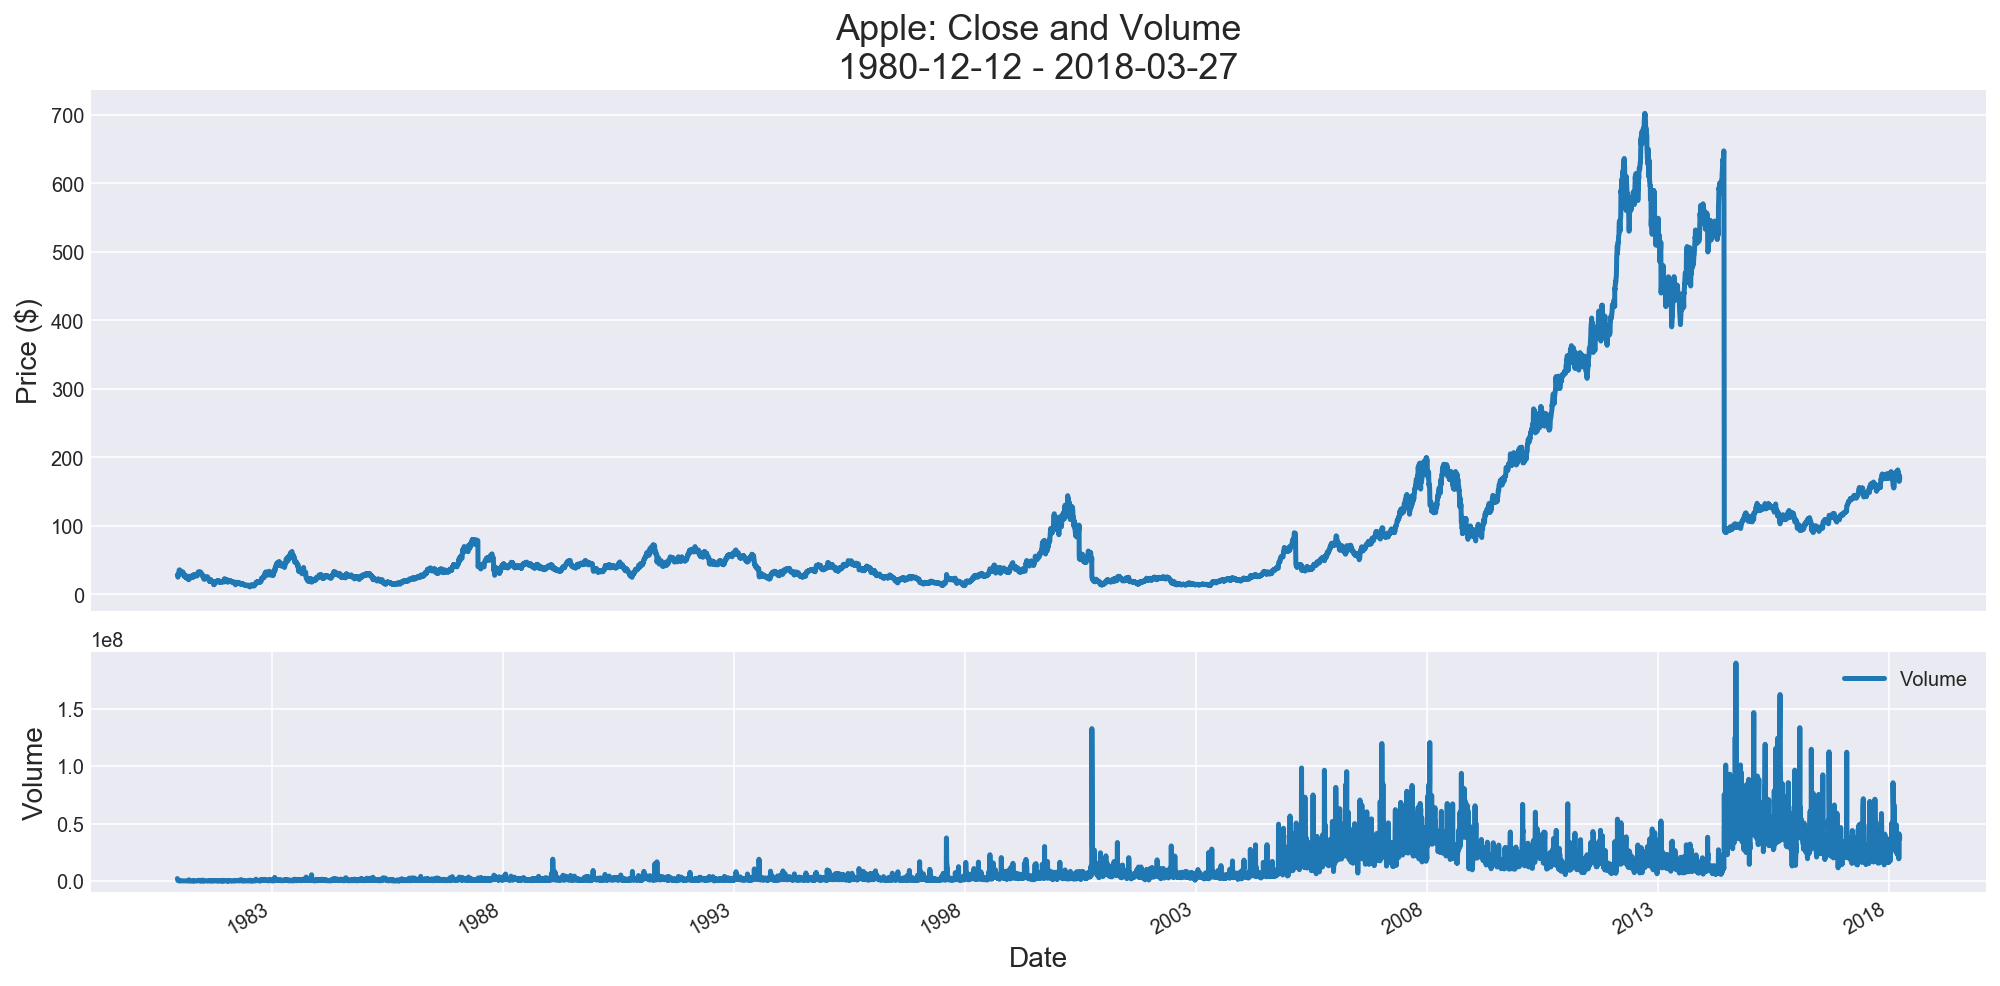

In [15]:
make_a_plot(df, 'Close', 'Volume', subplots=True)

<a class="anchor" id="Vol2"></a>
### Plotting with the Adjusted Price:

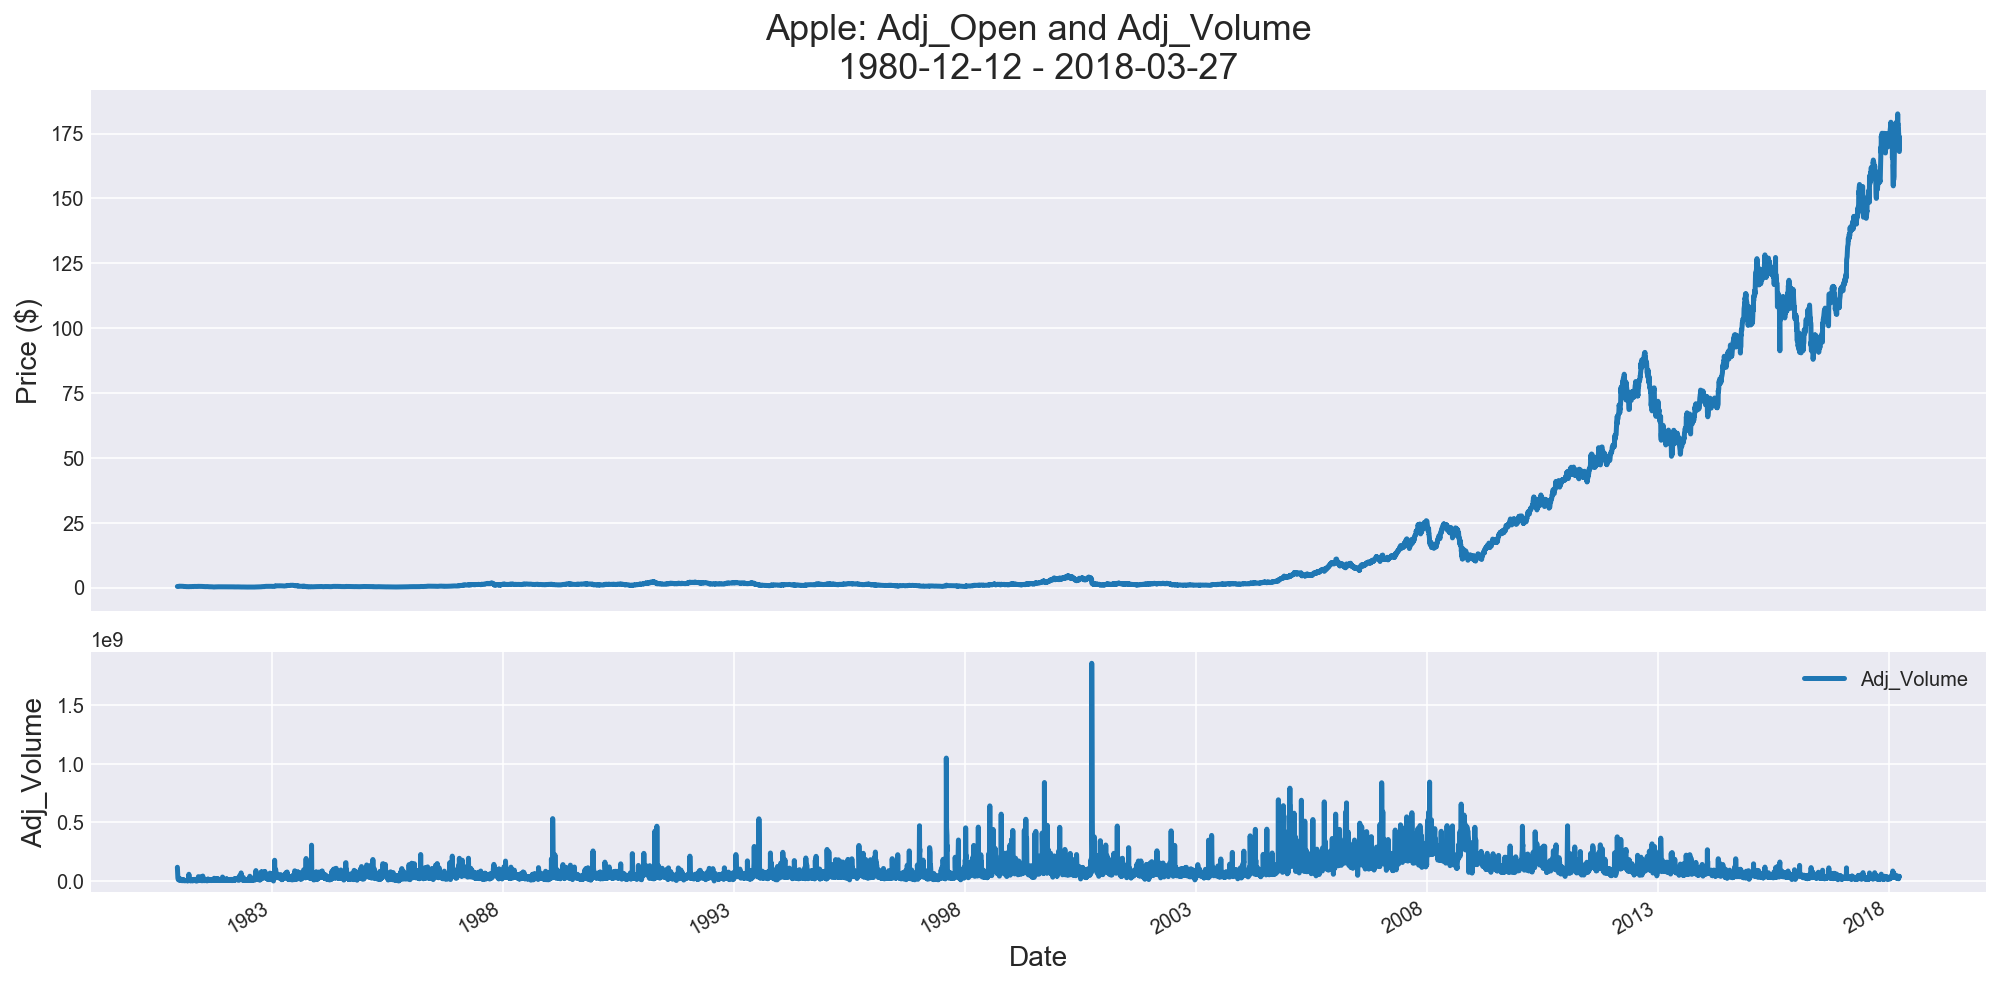

In [16]:
make_a_plot(df, 'Adj_Open', 'Adj_Volume', subplots=True)

--------
<a class="anchor" id="FE"></a>

# Feature Engineering:


## Creating a Function to Engineer Moving Averages (MA):

**Moving Averages** (MA) are indicators that follow trends, or lags, based on past prices often filtering and smoothening any "noise" from random price fluctuations. Two types of moving averages are calculated for this stock: **Simple Moving Average** & **Exponential Moving Average**. Each is calculated with a short (12-Day), medium (26-Day), and long (85-Day) lag.

- **Simple Moving Averages (SMA)**: is calculated by adding the most recent prices in a given period and dividing that value by the days in the period; therefore, computing the average.
- **Exponential Moving Averages (EMA)**: similar to the SMA, but an exponential weight is applied to all observations in a period of time.

----

In [17]:
def moving_averages(dataframe):
    """ 
    Returns a data frame with engineered moving averages.
    Two types of moving averages are calculated: Simple & Exponential. 
    Each type of moving average is calculated with a short (12-Day), medium (26-Day), and long (85-Day) lag.
   
    Parameters
    ---------------------------------------------------------------------------------------------------------
    dataframe : pd.DataFrame()
        Passes a dataframe.
    """
    
    temp_df = dataframe.copy()
    
    # Setting the Date as the Index and sorting in acsending order:
    temp_df.set_index('Date', inplace=True)
    temp_df.sort_index(inplace=True, ascending=True)
    
    # Calculating the Simple Moving Average:
    short_SMA = temp_df.rolling(window=12).mean().copy()
    mid_SMA = temp_df.rolling(window=26).mean().copy()
    long_SMA = temp_df.rolling(window=85).mean().copy()

    # Calculating the Exponential Moving Average:
    short_EMA = temp_df.ewm(span=12, adjust=False).mean().copy()
    mid_EMA = temp_df.ewm(span=26, adjust=False).mean().copy()
    long_EMA = temp_df.ewm(span=85, adjust=False).mean().copy()
    
#     MACD = short_EMA - mid_EMA
#     signal_line = MACD.ewm(span=9, adjust=False).mean().copy()
    
#     temp_df = pd.merge(temp_df, MACD, left_index=True, right_index=True, suffixes=['','_MACD'])
#     temp_df = pd.merge(temp_df, signal_line, left_index=True, right_index=True, suffixes=['','_Signal_Line'])
    
    # Merging the Simple Moving Avverages data frames with the original Data frame:
    temp_df = pd.merge(temp_df, short_SMA, left_index=True, right_index=True, suffixes=['','_Short_SMA'])
    temp_df = pd.merge(temp_df, mid_SMA, left_index=True, right_index=True, suffixes=['','_Mid_SMA'])
    temp_df = pd.merge(temp_df, long_SMA, left_index=True, right_index=True, suffixes=['','_Long_SMA'])
    
    # Merging the Exponential Moving Average data frames with the Original data frame:
    temp_df = pd.merge(temp_df, short_EMA, left_index=True, right_index=True, suffixes=['','_Short_EMA'])
    temp_df = pd.merge(temp_df, mid_EMA, left_index=True, right_index=True, suffixes=['','_Mid_EMA'])
    temp_df = pd.merge(temp_df, long_EMA, left_index=True, right_index=True, suffixes=['','_Long_EMA'])
    
    return temp_df

<a class="anchor" id="FE2"></a>
## Using the Function to Engineer Features:

In [18]:
new_df = moving_averages(df)
new_df.reset_index(level=0, inplace=True)
new_df.head()

,Date,Open,High,Low,Close,Volume,Ex_Dividend,Split_Ratio,Adj_Open,Adj_High,...,Low_Long_EMA,Close_Long_EMA,Volume_Long_EMA,Ex_Dividend_Long_EMA,Split_Ratio_Long_EMA,Adj_Open_Long_EMA,Adj_High_Long_EMA,Adj_Low_Long_EMA,Adj_Close_Long_EMA,Adj_Volume_Long_EMA
0,1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,...,28.750000,28.750000,2.093900e+06,0.0,1.0,0.422706,0.424470,0.422706,0.422706,1.172584e+08
1,1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,...,28.715116,28.715116,2.063465e+06,0.0,1.0,0.422237,0.423961,0.422193,0.422193,1.155540e+08
2,1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,...,28.634532,28.634532,2.026454e+06,0.0,1.0,0.421093,0.422776,0.421008,0.421008,1.134814e+08
3,1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,...,28.570241,28.570241,1.988302e+06,0.0,1.0,0.420145,0.421834,0.420063,0.420063,1.113449e+08
4,1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,...,28.525119,28.525119,1.949688e+06,0.0,1.0,0.419480,0.421170,0.419400,0.419400,1.091825e+08


------

---

# Visualizing Exponential Moving Averages (EMA) & Simple Moving Average (SMA)



## Creating a Function to Plot the Engineered Features:

In [19]:
def ma_plot(dataframe, column_1, column_2, column_3, column_4,
              start_date = None,
              end_date = None,
              company_name=company_name):
    """ 
    Returns a plot to visualize the stock prices.
    
    Parameters
    ---------------------------------------------------------------------------------------------------------
    dataframe : pd.DataFrame()
        Passes a dataframe.
    
    column_1, column_2, column_3, column_4 : 'str', 'str', 'str', 'str' 
        Plots four columns.
    
    start_date : 'str'
        Filters and begins plotting at the date passed in the formmat: 'YYYY-MM-DD'.
    
    end_date : 'str'
        Filters and ends plotting at the date passed in the formmat: 'YYYY-MM-DD'.
        
    company_name : 'str'
        Uses the company's name to label the graph. 
    """
    
    temp_df = dataframe.copy()
    
    # If any date is passed, this loop will filter accordingly
    if start_date:
        temp_df = temp_df[temp_df['Date']>=start_date]
    if end_date:
        temp_df = temp_df[temp_df['Date']<=end_date]
    # Setting the Date column as the Index
    temp_df.set_index('Date', inplace=True, drop=False)
        
    plt.figure(figsize=(14,7))
    
    sns.set_style("darkgrid")
    # Plotting the four columns
    temp_df[column_1].plot(lw=2.5)
    temp_df[column_2].plot(lw=2.5)
    temp_df[column_3].plot(lw=2.5)
    temp_df[column_4].plot(lw=2.5)


    plt.title(f'{company_name}:\n {column_1}, {column_2}, {column_3}, & {column_4}\n'
                  f'{str(temp_df.Date.min())[:10]} - {str(temp_df.Date.max())[:10]}', fontsize=18)
        
    plt.ylabel('Price ($)', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.legend()
    plt.tight_layout()

## Creating a Function to Plot per Aspect of the Price:

In [20]:
def plotting_ma(dataframe, price_type, start_date=None, end_date=None):
    """
    Returns two graphs, an SMA and an EMA, according an aspect of a trading day.
    
    Parameters
    ---------------------------------------------------------------------------------------------------------
    dataframe : var
        Passes the variable assigned to the dataframe.
        
    price_type : str
        Passes a string according to an aspect of a trading day; for instance: open, high, low, or close.
        
    start_date : str
        Passes a date as string in the format YYYY-MM-DD.
    
    end_date : str
        Passes a date as string in the format YYYY-MM-DD.
    """
    
    temp_df = dataframe.copy()

    SMA_list = []
    #  Appends every type of SMA, according to the price type, into the list.
    for col_name in temp_df.columns:
        if col_name == f'{price_type}' or col_name == f'{price_type}_Short_SMA' \
        or col_name == f'{price_type}_Mid_SMA' or col_name == f'{price_type}_Long_SMA':
            SMA_list.append(col_name)
    # Plots every type of SMA 
    ma_plot(temp_df, SMA_list[0], SMA_list[1], SMA_list[2], SMA_list[3], start_date=start_date, end_date=end_date)
    
    
    EMA_list = []
    #  Appends every type of EMA, according to the price type, into the list.
    for col_name in temp_df.columns:
        if col_name == f'{price_type}' or col_name == f'{price_type}_Short_EMA' \
        or col_name == f'{price_type}_Mid_EMA' or col_name == f'{price_type}_Long_EMA':
            EMA_list.append(col_name)
    # Plots every type of EMA 
    ma_plot(temp_df, EMA_list[0], EMA_list[1], EMA_list[2], EMA_list[3], start_date=start_date, end_date=end_date)

<a class="anchor" id="VIS"></a>

## Plotting Engineered Features: 

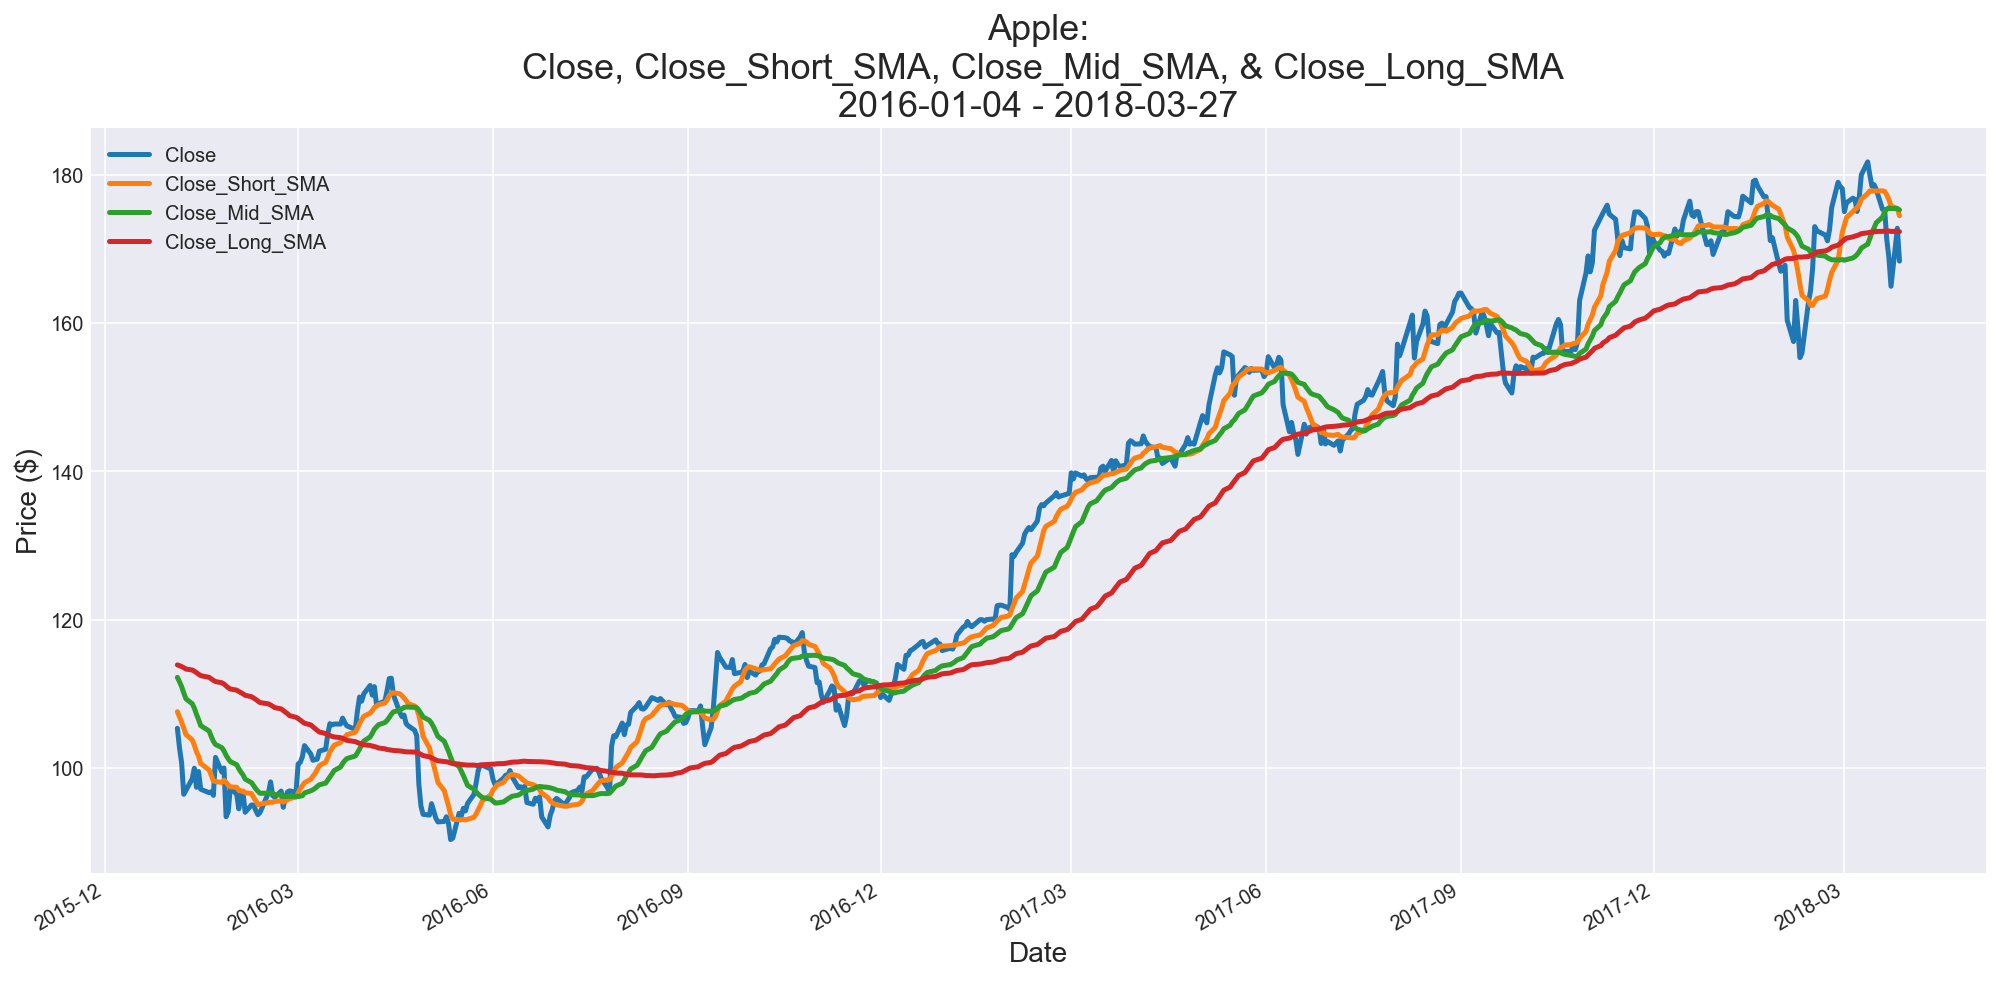

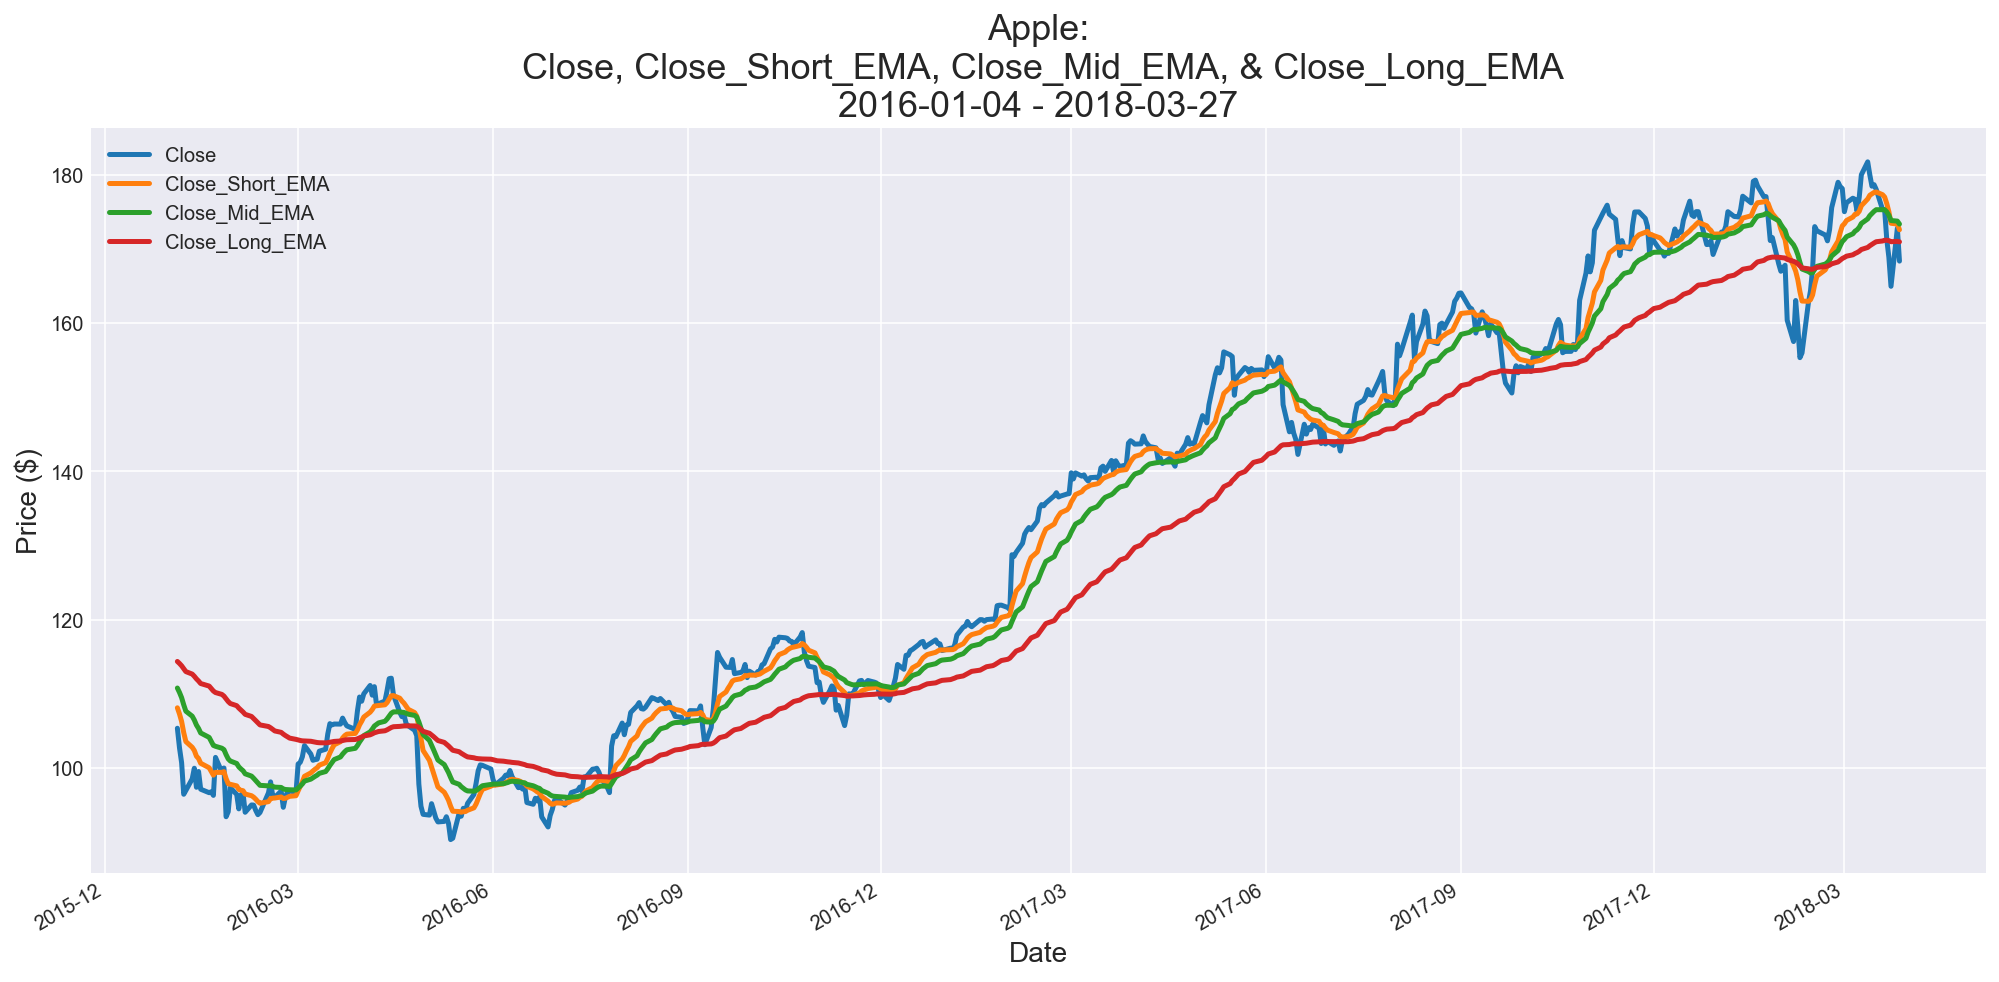

In [21]:
plotting_ma(new_df, 'Close', start_date='2016-01-01', end_date='2018-06-01')

<a class="anchor" id="VIS2"></a>

## Taking a Closer Look at the Engineered Features:

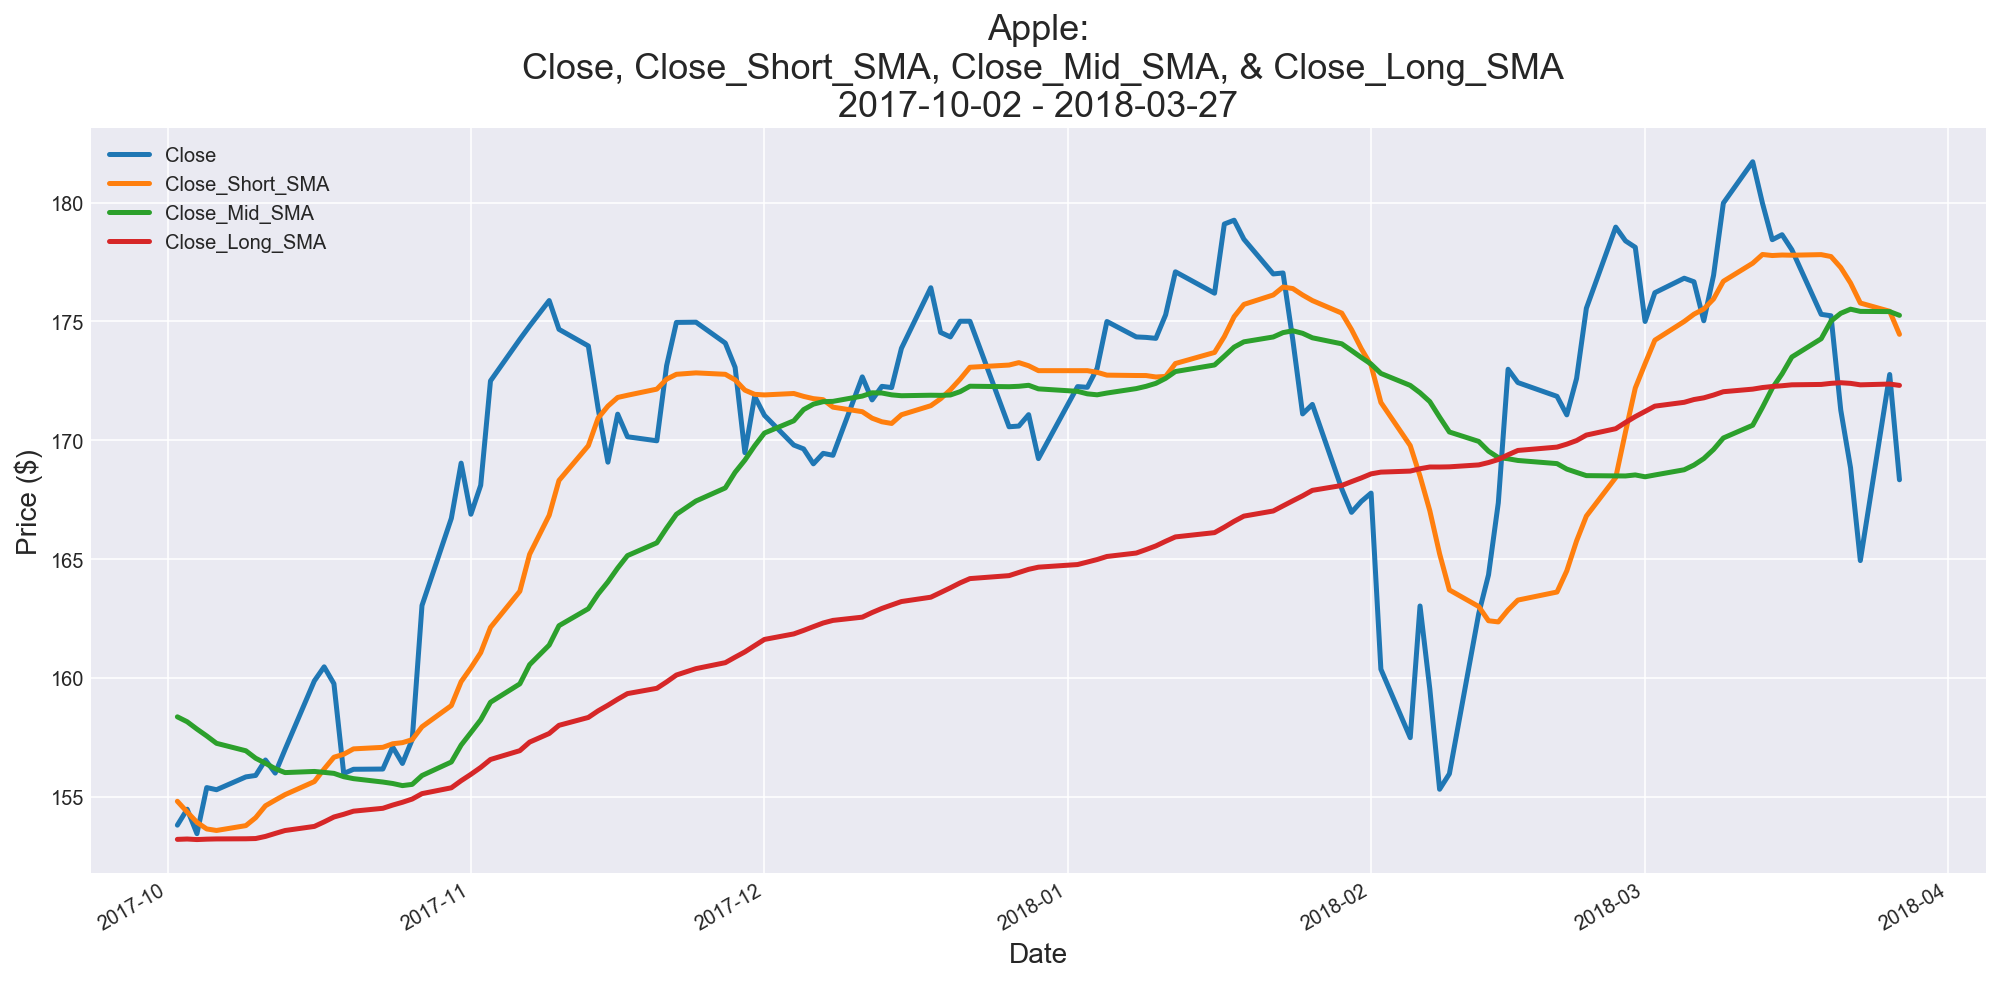

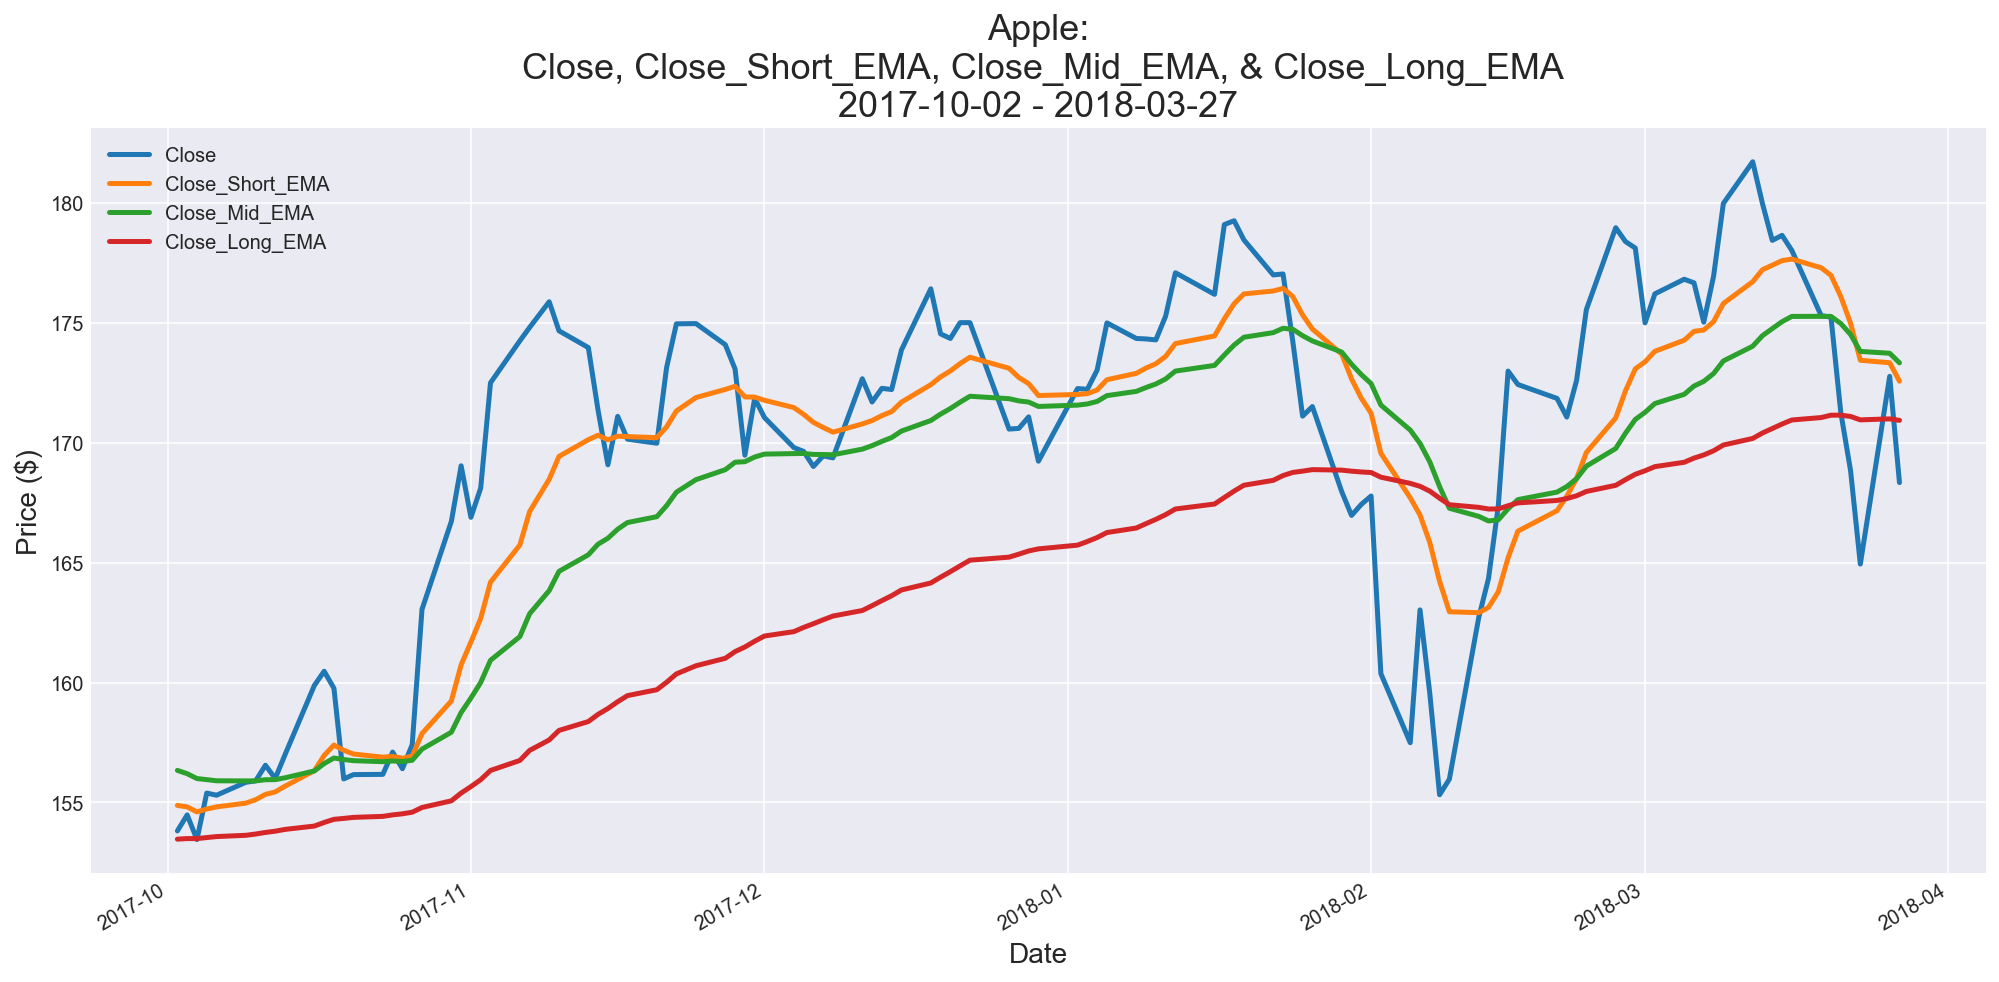

In [22]:
plotting_ma(new_df, 'Close', start_date='2017-10-01', end_date='2018-04-01')

-------
<a class="anchor" id="EDA2"></a>

# Exploratory Data Analysis on the New Data Frame

## Inspecting the New Data Frame:

In [23]:
new_df.shape

(9400, 85)

In [24]:
new_df.describe()

,Open,High,Low,Close,Volume,Ex_Dividend,Split_Ratio,Adj_Open,Adj_High,Adj_Low,...,Low_Long_EMA,Close_Long_EMA,Volume_Long_EMA,Ex_Dividend_Long_EMA,Split_Ratio_Long_EMA,Adj_Open_Long_EMA,Adj_High_Long_EMA,Adj_Low_Long_EMA,Adj_Close_Long_EMA,Adj_Volume_Long_EMA
count,9400.000000,9400.000000,9400.000000,9400.000000,9.400000e+03,9400.000000,9400.000000,9400.000000,9400.000000,9400.000000,...,9400.000000,9400.000000,9.400000e+03,9.400000e+03,9400.000000,9400.000000,9400.000000,9400.000000,9400.000000,9.400000e+03
mean,101.233437,102.466958,99.896250,101.194472,1.198560e+07,0.003633,1.000957,21.571019,21.774929,21.351252,...,99.267600,100.559178,1.184341e+07,3.630824e-03,1.000957,20.808616,21.005346,20.596116,20.805885,8.897394e+07
std,135.169307,136.294005,133.829528,135.087350,1.662310e+07,0.088269,0.064409,39.272529,39.584888,38.942651,...,130.915618,132.153028,1.438908e+07,1.122028e-02,0.006921,37.854133,38.154739,37.537214,37.856101,6.354269e+07
min,11.120000,11.120000,11.000000,11.000000,4.471000e+03,0.000000,1.000000,0.163495,0.163495,0.161731,...,13.993522,13.993522,1.511938e+05,0.000000e+00,1.000000,0.206578,0.207717,0.205744,0.205744,8.466851e+06
25%,27.000000,27.500000,26.500000,27.000000,1.232075e+06,0.000000,1.000000,0.923453,0.940280,0.904096,...,27.082405,27.443962,1.570009e+06,4.631341e-40,1.000000,0.958254,0.977456,0.939298,0.958613,4.505083e+07
50%,43.750000,44.500000,43.000000,43.880000,3.776200e+06,0.000000,1.000000,1.437461,1.468272,1.410762,...,42.313055,43.025090,4.346973e+06,4.766479e-16,1.000000,1.420354,1.455608,1.385061,1.419207,6.492729e+07
75%,110.120000,111.755000,108.747500,110.060000,1.808312e+07,0.000000,1.000000,20.270182,20.565604,19.905845,...,111.128548,113.507586,1.987724e+07,1.636702e-03,1.000000,19.164565,19.428403,18.799211,19.120230,1.212256e+08
max,702.410000,705.070000,699.570000,702.100000,1.895606e+08,3.290000,7.000000,182.590000,183.500000,180.210000,...,630.341439,636.187596,5.953602e+07,9.745643e-02,1.139535,171.153238,172.664457,169.697149,171.130617,3.291167e+08


---

### Inspecting Missing Values:

In [25]:
new_df.isnull().sum().sum()

1440

### Dropping the First Weeks with any Missing Data:
Dropping the data because most of the company's have a long history and dropping the first weeks since the IPO will not affect the model when we try to forecast the price.

In [26]:
new_df.dropna(inplace=True)

### Sanity Check for Missing Values:

In [27]:
new_df.isnull().sum().sum()

0

### Checking the Shape of the New Dataframe:

In [28]:
new_df.shape

(9316, 85)

-----

### Taking a Look at the New Data Frame:

In [29]:
new_df.head(3)

,Date,Open,High,Low,Close,Volume,Ex_Dividend,Split_Ratio,Adj_Open,Adj_High,...,Low_Long_EMA,Close_Long_EMA,Volume_Long_EMA,Ex_Dividend_Long_EMA,Split_Ratio_Long_EMA,Adj_Open_Long_EMA,Adj_High_Long_EMA,Adj_Low_Long_EMA,Adj_Close_Long_EMA,Adj_Volume_Long_EMA
84,1981-04-14,27.88,28.00,27.88,27.88,29700.0,0.0,1.0,0.409914,0.411679,...,27.100545,27.100545,395955.964908,0.0,1.0,0.399428,0.400780,0.398454,0.398454,2.217353e+07
85,1981-04-15,26.63,26.63,26.50,26.50,152000.0,0.0,1.0,0.391536,0.391536,...,27.086579,27.086579,390282.570375,0.0,1.0,0.399245,0.400565,0.398249,0.398249,2.185582e+07
86,1981-04-16,25.12,25.12,25.00,25.00,106600.0,0.0,1.0,0.369335,0.369335,...,27.038054,27.038054,383685.301297,0.0,1.0,0.398549,0.399838,0.397535,0.397535,2.148638e+07


-------

# Saving to a CSV File:

### Saving the Engineered Data Frame:

In [30]:
new_df.to_csv(f'../stocks/data/{company_name}_Engineered.csv', index=False)

### Saving the Clean Original Data Frame:

In [31]:
df.to_csv(f'../stocks/data/{company_name}_Clean.csv', index=False)